<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette étude a été réalisée dans le cadre du 4eme projet de ma formation Datascientist dispensée en MOOC par 
**<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>**.
</p>    

<p>
Ce notebook présente un modèle de prédiction des retards d'avions. 
</p>
<p>
Le modèle se base sur les données fournies par le site :
</p>
<p>
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
</p>
<p>
</p>
</font>

# <font color='blus'> Synthèse du 14/06/2018</font>
* Heure de départ :implémentation de la périodicité sur [0,2PI] (configurable)
* Mois :implémentation de la périodicité sur [0,2PI] (configurable)
* Impémentation d'un estimateur par route et validation : ~ 4000 routes
* Pour chaque route : implémentation des modèles suivant :
    ** Lasso
    ** Ridge
    ** LinearRegression
    ** SGDRegressor avec un GridSearchCV
* Optimisation de la mémoire en compressant en RAM (zlib)
* Chargement et test du dataset sur 8 mois.    
* Traitement du features à l'origine de data-leakage
* Heure de départ (CRS_DEP_TIME) : implementation d'un dataframe réduit avec les informations strictement nécessaires pour faire la régression linéaire et renvoyer la prédiction.

## <font color='blue'>Déploiement</font>
* Composant P4_ModelBuilder : fabrication du composant LinearDelayPredictor
* Implémentation du composant LinearDelayPredictor pour déploiement. Test et validation.


# <font color='blus'> Synthèse du 07/06/2018</font>
* Heure de départ : indication avant midi et après midi
* Data leakage : enlever distance et arr_time dans un modele par route.
* Utilisation des modèles fins : en production oui pour les modèles fins mais attention pour l'exercice.
* Variables de temps : tranches de 15mn
* Modele par route?
* Sans route : encodage des aeroports: par probabilité d'apparition dans le dataset; a partir des analyses exploratoires, calculer le retard moyen par aeroport et diviser par quartile. En fonction des quartiles : 0, 0.25, 0.75, 1.0; calculer  Faire un apply surl la colonne avec les 


**Ce modèle est fortement non linéaire; on a donc une approximation.**

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'max_iter':[5, 10, 20, 40], 'penalty':[None, "l1", "l2", "elasticnet"], "alpha":[0.0001, 0.001, 0.01], "l1_ratio": [0.15, 0.5, 0.85] }
model = SGDRegressor()
reg = GridSearchCV(model, parameters, cv=3, scoring='neg_mean_absolute_error')
reg.fit(X_train, y_train)
best_model = reg.best_estimator_
y_pred = best_model.predict(X_test)
print(mean_squared_error(y_test, y_pred)**(1/2))
mean_absolute_error(y_test, y_pred)



## <font color='blue'>Modeles de regression</font>
* Dummy
* LinearRegression
* Ridge
* Lasso
* Utilisation de LassoCV
* Utilisation de RidgeCV
* Utilisation de GridSearcv avec Lasso, Ridge, ElasticNet
## <font color='blue'>Déploiement</font>
* Composant P4DataModel
* Implementation du modele par route et par transporteur
* Implementation du modele avec retards et avances différentiés


# <font color='blus'> Synthèse du 31/05/2018</font>

## <font color='blue'>Data preparation</font>
* Rework : choix des variables pour l'analyse exploratoire
* Data préparation en vue d'abtenir des modèles de regression linéaires performants.

## <font color='blue'>Analyse exploratoire</font>
* **<font color='blue'>Hypothèse : la frequentation relative est indépendante du mois</font>**
* Analyse dela distribution des retards
* Analyse de la variation des retards pour une route donnée, en fonction de différentes variables
    * Jour dans le mois
    * Transporteurs
    * Jour de la semaine
    * Date du vol
* <font color='red'>Justification du choix des variables dans le modèle de prédiction</font>

## <font color='blue'>Modèle de régression linéaire</font>
* Choix des variables : justification
* Algorithmes de regression linéaires : SVR, ElasticNet, ... : pas de résultat probant
* Mise e évidence de la nature gaussiennne du bruit (hypothese de regression linéaire)
* Data leak: ??
* Incidences de la correlation des variables sur les performances du modèle.

## <font color='blue'>Session de mentorat</font>
SGDR Regression : méthode de déscente dans le cas de gros modeles numériques.
Convergence iterative vers le vecteur beta.
Lecture d'un fichier --> partial_fit()
Le modele fait converger le beta pendant l'entraînement
Permet de sortir des scores intermédiaires.
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

Utiliser MAE et MSE et R2 en complément.

Utiliser MAE avec  R2 qui est plus frequement utilisé que R2
MSE : moyenne des diff au carré.

Utiliser CRS_ARR en place de CRS_ELAPSED_TIME

Attetion au OneHotEncoding : utiliser le mm objet pour encoder tous les data issues des différents fichiers.
Sinon : risque de pb d'indexes.


# <font color='blus'> Synthèse du 24/05/2018</font>

## <font color='blue'>Nature du pb à résoudre</font>
* Problème de prédiction.
* Orientation vers un algorithme de régression tels que vue en cours : ElasticNet.

## <font color='blue'>Acquisition des données</font>
* Problème de débordement mémoire

## <font color='blue'>Préparation des données</font>
* Traitement des valeurs a Nan

## <font color='blue'>Analyse exploratoire</font>
Objectifs: appréhender la nature du problème à résoudre pour s'orienter vers des modèles de prédictions.
* Correlations
* Analyse en composantes principales :  quelles sont les variables qui expliquent le plus la variance? Réduction de dimension possible?

## <font color='blue'>Evaluation des modèles de prédiction</font>
* Modèle linéaire : basé sur une combinaison linéaire des variables.__Comment justifier l'hyopthèse de linéarité?__
* Choix des hyper-paramètres : Grid search
* Entraînement des modèles : validation croisée
* Prédiction des retards avec un score : prédiction de la valeur du retard
* Prédiction binaire du retard : en retard / pas en retard
* Comparaison des performances avec des modèles naïfs.
* Augmentation de la performance des algorithmes évalués

## <font color='blue'>Choix du modèle de prédiction</font>


* Anticiper les retards : retard = heure atterissage - heure prévue.
* Créer la colonne avant la séparation et supprimer la colonne dont elle dépend. Sinon phénomène de __DATA LEAKAGE__. *En effet, si on utilise deux variables pour en créer une 3eme, alors lorsque l'on va prédire, à un instant dans le futur, une valeur pour cette 3eme variable, les valeurs des 2 variables utilisées ne seront plus valables au moment de la prédiction. Les variables ayant servies à créer cette nouvelle variable doivent être **exclues du modèle**.*.

* Les étiquettes sont a valeurs dans les réels. On utilisera donc une regression linéaire pour la prédiction des retards.

* Après modélisation, si la mtrice X.T.dot(X) est inversible, alors le pb admet une solution unique et explicite, issue de la maximisation de la vraissemblance du modèle, i.e, la maximisation de la probabilité de calculer la valeur de la cible (ici, pour ce problème, les retards).

* Technique courante sur les lignes : définir les indices das un vecteur modele réduit Etudier l'impact de la taille des données d'entraînement sur la qualité de la prédiction. 20%, 40%, 30% de l'entraînement et regarder la performance.
* Supprimer les colones qui n'apporent rien a la prediction
* Regression : foncton de out a optimiser va inclure les coeff de Ridge de et Lasso Initialement, sans regularisation. Par la suite, essayer la recherche d'hyper-paramètres l1 et l2 qui controlent Ridge et Lasso. __Coder une seule loss__ qui jauge l'effet de la régularisation L1 et L2. __==> utiliser la regression elestic net.__

* Conclusion : jouer le jeux de test et évaluer l'erreur quadratique.

* __Le pb est formulé en prédiction__ : entraîner un modele sur Janv--> mars, essayer sur Avril. Ce, pour répondre a la probléamatique : évaluer les retards dans le futur.
* Entraîner surr 15 premiers jours et tester sur les derniers jours.





# <font color='blus'> Synthèse du 19/05/2018</font>

## <font color='blue'>Acquisition des données</font>
* Exploration des données et modèle sur un mois

## <font color='blue'>Préparation des données</font>
* Traitement des valeurs a Nan remplacées par la valeur moyenne dans le vecteur étiquette 
* Mises a 0 sur les autres données.

## <font color='blue'>Analyse exploratoire</font>
Objectifs: appréhender la nature du problème à résoudre pour s'orienter vers des modèles de prédictions.
* Correlations : données corrélées sur les retards ==> élimination des colonnes corrélées?

## <font color='blue'>Evaluation d'un modèle de prédiciton binaire : KNN</font>
* Choix des hyper-paramètres : Grid search
* Entraînement des modèles : validation croisée
* Affichage des performances du modèle : MSE et matrice de confusion

## <font color='blue'>Modèle de prédiction par regression : SVR </font>
* Données d'entraînement : sur un mois, les 3 premières semaines.
* Regression linéaire par vecteur de support


## Commentaires de la session
* Bruit Gaussien : pour valider les hypothèses de la mise en oeuvre de la regression linéaire, faire un histogramme a posteriori en utilisant le calcul de l'erreur entre les données mesurées et la valeur d'une regression linéaire simple.

* Indépendance : vérifier que les colonnes ne sont pas indépendantes. Au sens conceptuel du terme : heure dans deux colonnes pas exeemple. 
* Data leakage : retard au depart et retard a l'arrivée. Predire a partir des informations indépendantes du retard de départ. Enlever le retard de départ; cela ne se justifie pas par l'IID. Dans la réaalité pas accès à cette information.

* Scikitlearn : entrainer le modele et remplacer les données par des nvx modeles .Partial feed Voir http://scikit-learn.org/stable/modules/scaling_strategies.html
* Se focaliser sur la regression linéaire Ridge / Lasso
* Utiliser les regression KNN et Linear SVR en termes de références, baseline ou pour approfondir l'étude.




# <font color='blues'>Paramètres globaux du modèle</font>

In [1]:
is_df_with_route = False
is_route_in_model  = False
is_carrier_model = False
is_delay_outlier_removed = True

dict_delay_splitted = {'past':0,'futur':0,'present':0}

# <font color='blues'>Acquisition des données</font>

__Loading Python lib used for project__

In [2]:
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn import model_selection
from scipy import sparse

import matplotlib.pyplot as plt

import time
import pickle

from P4_ModelBuilder import *
from p3_util import *
from p3_util_plot import *
from p4_util import *

__Data loading from a fixed month__

In [3]:
path_to_data = "../outside_p4/data/Dataset+Projet+4_2/"

list_col_keep = [
 'CRS_DEP_TIME'
,'ORIGIN_AIRPORT_ID'
,'DEST_AIRPORT_ID'          
,'ORIGIN_CITY_NAME'
,'DEST_CITY_NAME'             
,'ARR_DELAY'
,'AIRLINE_ID'    
,'MONTH'
,'DAY_OF_MONTH'
,'DAY_OF_WEEK'
,'CARRIER'
,'CRS_ARR_TIME'    
,'CRS_ELAPSED_TIME'    
,'DISTANCE'
,'ORIGIN_STATE_ABR'
,'DEST_STATE_ABR'
]

#-------------------------------------------------------------------------
# These features are used for user test 
#-------------------------------------------------------------------------
list_for_user_test =['MONTH','DAY_OF_MONTH','DAY_OF_WEEK'\
      , 'CRS_DEP_TIME','AIRLINE_ID','ORIGIN_CITY_NAME','DEST_CITY_NAME'\
      ,'ARR_DELAY','CARRIER','CRS_ARR_TIME','FL_NUM']

#-------------------------------------------------------------------------
# These features are excluded from data model
#-------------------------------------------------------------------------
list_excluded = ['WEEK_OF_MONTH','CARRIER','CRS_ARR_TIME','FL_NUM']

#list_month = ['01','02','03','04','05','06','07','08','09','10','11','12']
list_month = ['01','02','03','04']

list_skip_rows_04 = [121011,386248,388290,389370,389547,453857]
dict_skip_rows = dict()
dict_skip_rows['01'] = None
dict_skip_rows['02'] = None
dict_skip_rows['03'] = None
dict_skip_rows['04'] = list_skip_rows_04
dict_skip_rows['05'] = None
dict_skip_rows['06'] = None
dict_skip_rows['07'] = None
dict_skip_rows['08'] = None
dict_skip_rows['09'] = None
dict_skip_rows['10'] = None
dict_skip_rows['11'] = None
dict_skip_rows['12'] = None
list_for_cleaning = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK'\
                     ,'AIRLINE_ID','ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID','CRS_DEP_TIME', 'ARR_DELAY']

In [4]:
   #----------------------------------------------------------------------------
   #
   #----------------------------------------------------------------------------
   def clean(_df, list_to_keep) :
      '''Clean all columns outside from list_to_keep
      Drop raws from which values are Nan.
      '''
      #-------------------------------------------------------------------------
      # Build list to drop from list given as parameter
      #-------------------------------------------------------------------------
      list_col_drop = list()
      for col in _df.columns:
          if col not in list_to_keep :
              list_col_drop.append(col)

      _df = df_drop_list_column(_df,list_col_drop)        

      ser_col_nan = _df.isnull().any()
      list_col_nan = list()
      for col, status in ser_col_nan.iteritems() :
          if status is  True :
              list_col_nan.append(col)
              
      print("Columns targeted for nan : "+str(list_col_nan))

      _df.dropna(axis=0, how='any', inplace=True)   
      return _df
   #----------------------------------------------------------------------------


In [5]:
   #----------------------------------------------------------------------------
   #
   #----------------------------------------------------------------------------
   def _clean_value_from_list(_df, list_for_cleaning):
       ''' Drop raws considering criterias applied on values for 
       each feature given as list in parameter.
       Criterias apply as following :
         --> If any value is not digit, raw containing this feature is deleted.
         --> All values are casted into integer type.
    '''
        
       if 0>= len(list_for_cleaning)  or list_for_cleaning is None :
         return

       for column_for_cleaning in list_for_cleaning :
           # mark as -1 fields that are not digit
           print("\n"+str(column_for_cleaning)+" : ...")
           #----------------------------------------------------------------------
           # Clean rows from Nan values
           #----------------------------------------------------------------------
           #_df.dropna(axis=1, how='all',inplace=True)
           #_df.dropna(axis=0, how='all',inplace=True)
           print(_df.shape)
           _df[column_for_cleaning].dropna(axis=0, inplace=True)
           print(_df.shape)


           #--------------------------------------------------------------------
           # Printing for debug
           #--------------------------------------------------------------------
           if column_for_cleaning != 'ARR_DELAY' \
           and column_for_cleaning != 'ORIGIN_AIRPORT_ID' \
           and column_for_cleaning != 'DEST_AIRPORT_ID':
               print(_df[column_for_cleaning].unique())

           #--------------------------------------------------------------------
           # Mark none digit values in order raw holding this value to be deleted.
           #--------------------------------------------------------------------
           _df[column_for_cleaning] = \
           _df[column_for_cleaning].apply(p4_mark_none_digit)

           #--------------------------------------------------------------------
           # Printing for debug
           #--------------------------------------------------------------------
           if column_for_cleaning != 'ARR_DELAY' \
           and column_for_cleaning != 'ORIGIN_AIRPORT_ID' \
           and column_for_cleaning != 'DEST_AIRPORT_ID':
               print(_df[column_for_cleaning].unique())

           #--------------------------------------------------------------------
           # All digit are casted into integer
           #--------------------------------------------------------------------
           try :
               _df[column_for_cleaning] = \
               _df[column_for_cleaning].apply(lambda x: int(x))
           except  ValueError as valueError:
               print("*** ERROR : column= "+str(column_for_cleaning)+" error= "+str(valueError))
           #--------------------------------------------------------------------
           # Printing for debug
           #--------------------------------------------------------------------
           if column_for_cleaning != 'ARR_DELAY' \
           and column_for_cleaning != 'ORIGIN_AIRPORT_ID' \
           and column_for_cleaning != 'DEST_AIRPORT_ID':
               print(_df[column_for_cleaning].unique())

           if column_for_cleaning != 'ARR_DELAY' :
               #----------------------------------------------------------------
               # Excepted values from feature ARR_DELAY
               # raws with strictly negative value are deleted.
               #----------------------------------------------------------------
               _df = _df[_df[column_for_cleaning]>=0] 


           #--------------------------------------------------------------------
           # Printing for debug
           #--------------------------------------------------------------------
           if column_for_cleaning != 'ARR_DELAY' \
           and column_for_cleaning != 'ORIGIN_AIRPORT_ID' \
           and column_for_cleaning != 'DEST_AIRPORT_ID':
               print(_df[column_for_cleaning].unique())

           #--------------------------------------------------------------------
           # Months belongs to interval [1, 12]
           #--------------------------------------------------------------------
           if column_for_cleaning == 'MONTH' :
               _df = _df[_df[column_for_cleaning]<=12] 


           print(column_for_cleaning+" : Done!\n")
       return _df
   #-------------------------------------------------------------------------------


In [6]:
    def load_and_clean(_df, year, list_month,list_to_keep,list_for_cleaning,dict_skip_rows=None) :
      #----------------------------------------------------------------------
      # Tempory dataframe initialization; used for data agrregation 
      # issued formm files  
      #----------------------------------------------------------------------
      df_concat = pd.DataFrame()
      nb_file_dumped = 0
      t0 = time.time()
      is_partial_file = True
      for month in list_month :
         #----------------------------------------------------------------------
         # Read file and store it into working dataframe
         # Some rows, depending on month-file, leading to read errors, are skipped .
         #----------------------------------------------------------------------
         if dict_skip_rows is not None :
            list_skip_rows = dict_skip_rows[month]
         else :
            list_skip_rows = None         
         
         _df , list_col_notdigit = \
         p4_df_read_from_list_month(path_to_data+year, month,list_skip_rows=list_skip_rows)
         #----------------------------------------------------------------------
         # Clean columns regarding column list in list_to_keep
         #----------------------------------------------------------------------
         _df = _df[list_to_keep]   
         _df.dropna(inplace=True, axis=0)
         clean(_df, list_to_keep)

         #----------------------------------------------------------------------
         # Aggregation : cleaned dataframe is aggregated with df_concat
         #----------------------------------------------------------------------
         df_concat = pd.concat([df_concat, _df ],axis=0)

         #----------------------------------------------------------------------
         # Clear dataframe memory before coyping concatened dataframe in it.
         #----------------------------------------------------------------------
         _df = pd.DataFrame()

         #----------------------------------------------------------------------
         # Dataframe serialisation
         #----------------------------------------------------------------------
         if is_partial_file :
            if 0 == int(month) % 4 :
                #----------------------------------------------------------------------
                # Copy back aggregated dataframe
                #----------------------------------------------------------------------
                _df = pd.DataFrame()
                _df = df_concat.copy()

                #----------------------------------------------------------------------
                # Clean values from list when these values do not match some criterias.
                # This criteria depends on features into list_for_cleaning.
                #----------------------------------------------------------------------
                _clean_value_from_list(_df, list_for_cleaning)

                #----------------------------------------------------------------------
                # resources used in this method are released.
                #----------------------------------------------------------------------
                del(df_concat)


                nb_file_dumped += 1
                fileName = path_to_data+"partFile_"+str(nb_file_dumped)
                with open(fileName,"wb") as dumpedFile :
                    oPickler = pickle.Pickler(dumpedFile)
                    oPickler.dump(_df)
                print("\nPartial file = "+str(fileName)+" dumped!\n")    
                #----------------------------------------------------------------------
                # Clear concatened dataframe memory 
                #----------------------------------------------------------------------
                df_concat =pd.DataFrame()    


      t1 = time.time()
      print("Time for reading data : %0.3F" %(t1-t0))
      if not is_partial_file :
          #----------------------------------------------------------------------
          # Copy back aggregated dataframe
          #----------------------------------------------------------------------
          _df = pd.DataFrame()
          _df = df_concat.copy()

          #----------------------------------------------------------------------
          # Clean values from list when these values do not match some criterias.
          # This criteria depends on features into list_for_cleaning.
          #----------------------------------------------------------------------
          _clean_value_from_list(_df, list_for_cleaning)

          #----------------------------------------------------------------------
          # resources used in this method are released.
          #----------------------------------------------------------------------
          del(df_concat)
      return _df


In [7]:
df_delay_digit = pd.DataFrame()
df_delay_digit =  load_and_clean(df_delay_digit, str(2016), list_month,list_col_keep,list_for_cleaning,dict_skip_rows=dict_skip_rows)

Month 01 loaded!
Columns targeted for nan : []
Month 02 loaded!
Columns targeted for nan : []
Month 03 loaded!
Columns targeted for nan : []
Month 04 loaded!
Columns targeted for nan : []

MONTH : ...
(1797433, 16)
(1797433, 16)
[1 2 3 4]
[1 2 3 4]
[1 2 3 4]
[1 2 3 4]
MONTH : Done!


DAY_OF_MONTH : ...
(1797433, 16)
(1797433, 16)
[6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 1 2 3 4 5 '3' '4' '5' '29' '30' '1' '2' '6' '7' '8' '9' '10' '11' '12'
 '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26'
 '27' '28' '31']
[6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 1 2 3 4 5 '3' '4' '5' '29' '30' '1' '2' '6' '7' '8' '9' '10' '11' '12'
 '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26'
 '27' '28' '31']
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31  1  2  3  4  5]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31  1  2  3  4  5]
DAY_OF

In [8]:
list_state = df_delay_digit.ORIGIN_STATE_ABR.unique().tolist()
#list_state

## <font color='blue'>Modele climatique</font>

In [9]:
dict_climate = dict()
# Climat tempéré océanique : 1
dict_climate['WA']=1
dict_climate['OR']=1

# Climat tempéré continental sec : 2
list_climate_2 = ['ID','MT','WY','UT','CO','ND','SD','NE','KS','OK']
for state in list_climate_2 :
    dict_climate[state]=2
    
# Climat tempéré continental pacifique : 3

# Climat sub-tropical : 4
list_climate_4 = ['VA','NC','GA','FL','AL','TN','MS','LA','AR']
for state in list_climate_4 :
    dict_climate[state]= 4

# Climat Aride : 5
list_climate_5 = ['AZ','TX','NM','NV']
for state in list_climate_5 :
    dict_climate[state]= 5

# Climat tempéré méditéranéen : 6
list_climate_6 = ['CA']
for state in list_climate_6 :
    dict_climate[state]= 6

for state in list_state :
    if state not in dict_climate.keys() :
        dict_climate[state] = 3
print(len(dict_climate))
#print(dict_climate)

def state_climate_build(state) :
    return dict_climate[state]

df_delay_digit['ORIGIN_CLIMAT'] = df_delay_digit.ORIGIN_STATE_ABR.apply(state_climate_build)
df_delay_digit['DEST_CLIMAT'] = df_delay_digit.DEST_STATE_ABR.apply(state_climate_build)

#del(df_delay_digit['ORIGIN_STATE_ABR'])
df_delay_digit.sample(2)
df_delay_digit_save = df_delay_digit.copy()

52


In [10]:
df_delay_digit.sample(3)

,CRS_DEP_TIME,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_CITY_NAME,ARR_DELAY,AIRLINE_ID,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,ORIGIN_STATE_ABR,DEST_STATE_ABR,ORIGIN_CLIMAT,DEST_CLIMAT
391291,845.0,14679,13796,"San Diego, CA","Oakland, CA",-9.0,19393,2,21,7,WN,1015.0,90.0,446.0,CA,CA,6,6
14834,2115.0,11042,11298,"Cleveland, OH","Dallas/Fort Worth, TX",-46.0,20416,2,6,6,NK,2312.0,177.0,1021.0,OH,TX,3,5
325020,2022.0,11433,15370,"Detroit, MI","Tulsa, OK",42.0,20366,1,8,5,EV,2204.0,162.0,789.0,MI,OK,3,2


In [11]:
df_delay_digit = df_delay_digit_save.copy()

In [12]:
len(df_delay_digit_save.ORIGIN_AIRPORT_ID.unique()), len(df_delay_digit_save.ORIGIN_CITY_NAME.unique())

(593, 293)

In [13]:
df_delay_digit.columns

Index(['CRS_DEP_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'AIRLINE_ID',
       'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'CRS_ARR_TIME',
       'CRS_ELAPSED_TIME', 'DISTANCE', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR',
       'ORIGIN_CLIMAT', 'DEST_CLIMAT'],
      dtype='object')

# <font color='blues'>Data preparation</font>

In [14]:
df_delay_digit = df_delay_digit_save.copy()

__Identification des colonnes non numériques : <font color='blue'>list_col_notdigit</font>__

*Les colonnes en gras sont à encoder*

* **FL_DATE : date du vol**
* UNIQUE_CARRIER : identification unique du transporteur
* CARRIER : identification du transporteur
* TAIL_NUM : marquage sur la carliingue de l'avion
* ORIGIN : aeroport de départ
* **ORIGIN_WAC : aeroport de départ, en code international**
* **ORIGIN_STATE_FIPS : origine encdée par le bureau fédéral**
* ORIGIN_CITY_NAME : ville a laquelle l'aeroport d'origine est rattachée
* ORIGIN_STATE_ABR : abbréviation de l'état d'origine du vol
* ORIGIN_STATE_NM : état d'origine du vol
* DEST : aeroport de destination
* **DEST_WAC : aeroport de destination en code international**
* DEST_CITY_NAME : nom de la ille de destination
* DEST_STATE_ABR : abbréviation de l'état de destination du vol
* DEST_STATE_NM : état de destination du vol
* **DEP_TIME_BLK : fenêtres temporelles de départ**
* **ARR_TIME_BLK : fenêtres temporelles d'arrivée**
* AIR_TIME : temps de vol avant atterissage et après décolage
* CANCELLATION_CODE : code d'annulation

### <font color='blue'>Correspondance bi-univoque entre CARRIER et  AIRLINE_ID</font>

* Le nom des compagnies aériennes est plus parlant pour un utilisateur que les codes transporteur.
* On fait donc l'hypothèse qu'une compagnie est aérienne est assimilable à un transporteur.

In [15]:
df_delay_digit.columns

Index(['CRS_DEP_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'AIRLINE_ID',
       'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'CRS_ARR_TIME',
       'CRS_ELAPSED_TIME', 'DISTANCE', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR',
       'ORIGIN_CLIMAT', 'DEST_CLIMAT'],
      dtype='object')

In [16]:
print(df_delay_digit.shape)
df_delay_digit.drop_duplicates().shape

(1797433, 18)


(1797433, 18)

In [17]:
print("Nb CARRIER = "+str(len(df_delay_digit_save.CARRIER.unique())))
print("Nb AIRLINE_ID = "+str(len(df_delay_digit_save.AIRLINE_ID.unique())))

Nb CARRIER = 12
Nb AIRLINE_ID = 12


## <font color='blue'>Data LEAKAGE</font>

* Purge des variables qui contiennent de l'information sur les retards à prédire.

Comme il est possible de prédire les retards avec les variables CRS_ARR_TIME et ARR_TIME, cett dernière 
 est purgée du modèle.

Toutes les variables signant un retard sont purgées du modèle pour les mêmes raisons. Il s'agit : 
* DEP_DELAY
* DEP_DELAY_NEW
* ARR_DELAY_NEW
* ARR_DEL15
* ARR_DELAY_GROUP
* CARRIER_DELAY
* WEATHER_DELAY
* NAS_DELAY
* SECURITY_DELAY
* LATE_AIRCRAFT_DELAY





## <font color='blue'>Purge de variables</font>

__Liste des variables à conserver__

La variable <font color='blue'>FL_DATE</font> est substituable par le groupe  de variables <font color='blue'>(MONTH,DAY_OF_MONTH,DAY_OF_MONTH)</font>

__Purge des variables indésirables : celles qui ne sont pas dans <font color='blue'>list_col_keep</font>__

## <font color='blue'>Purge des lignes dont il existe des valeurs Nan</font>

In [18]:
ser_col_nan = df_delay_digit.isnull().any()
list_col_nan = list()
for col, status in ser_col_nan.iteritems() :
    if status is  True :
        list_col_nan.append(col)

print(list_col_nan)
rows_before = df_delay_digit.shape[0]
print(df_delay_digit.shape)
df_delay_digit.dropna(axis=0, how='any', inplace=True)
print(df_delay_digit.shape)
rows_after = df_delay_digit.shape[0]
print("Percent drop rows = %0.2F" %(100*np.abs(rows_before-rows_after)/rows_before))

[]
(1797433, 18)
(1797433, 18)
Percent drop rows = 0.00


# <font color='blues'>Exploration des données</font>

## <font color='blue'>Représentation des mois dans l'échantillon</font>

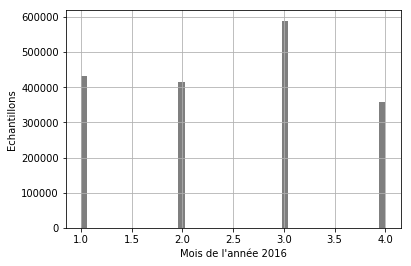

In [19]:
ax = df_delay_digit['MONTH'].hist(color='k', alpha=0.5, bins=50)

z_ = ax.set(xlabel="Mois de l\'année 2016")
z_ = ax.set(ylabel='Echantillons')

## <font color='blue'>Analyse de la correlation des variables dépendantes du temps</font>

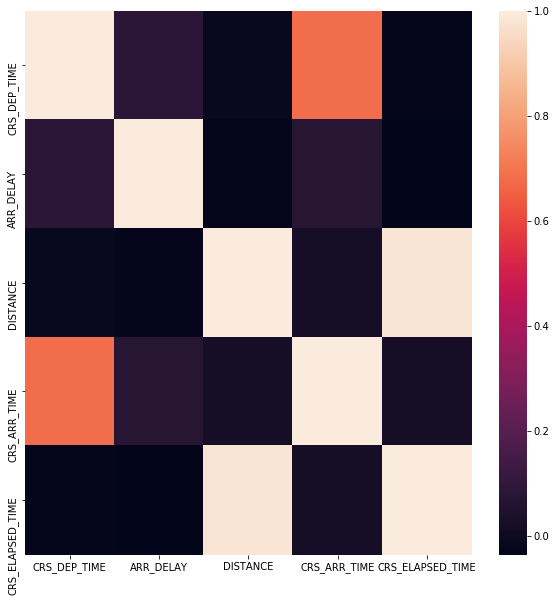

In [20]:
df_corr = df_delay_digit[['CRS_DEP_TIME', 'ARR_DELAY', 'DISTANCE','CRS_ARR_TIME','CRS_ELAPSED_TIME']].corr()
f, ax = plt.subplots(figsize=(10, 10))
_z = sns.heatmap(df_corr, annot=False)

Cette analyse montre, sans surprise, une forte corrélation entre les variables:
* <font color='blue'>DISTANCE</font> et <font color='blue'>CRS_ELAPSED_TIME</font>.
* <font color='blue'>CRS_ARR_TIME</font> et <font color='blue'>CRS_ELAPSED_TIME</font>.

Il n'est pas nécesssaire de garder dans le modèle ces deux variables.


In [21]:
df_delay_digit = df_drop_list_column(df_delay_digit,['CRS_ELAPSED_TIME','CRS_ARR_TIME'])

__Liste des colonnes résultantes__

In [22]:
df_delay_digit.columns

Index(['CRS_DEP_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'AIRLINE_ID',
       'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'DISTANCE',
       'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ORIGIN_CLIMAT', 'DEST_CLIMAT'],
      dtype='object')

 ## <font color='blue'>Analyse de la distribution des retards</font>

-------------------------ARR_DELAY--------------------------
Moyenne: 1.6173926928013451
Mediane: -7.0
Modes: 0   -10.0
dtype: float64
Variance: 1529.6670005202732
Ecart:39.11095755054168


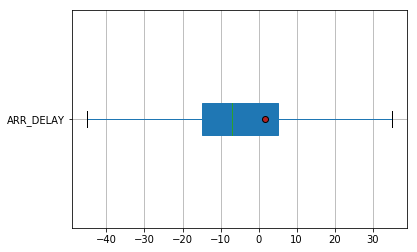

In [23]:
#df_delay_digit['ARR_DELAY'].boxplot()
df_boxplot_list_display(df_delay_digit, ['ARR_DELAY'], show_outliers=False )

-------------------------ARR_DELAY--------------------------
Moyenne: 1.6173926928013451
Mediane: -7.0
Modes: 0   -10.0
dtype: float64
Variance: 1529.6670005202732
Ecart:39.11095755054168


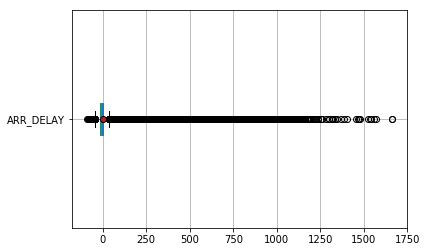

In [24]:
df_boxplot_list_display(df_delay_digit, ['ARR_DELAY'], show_outliers=True )

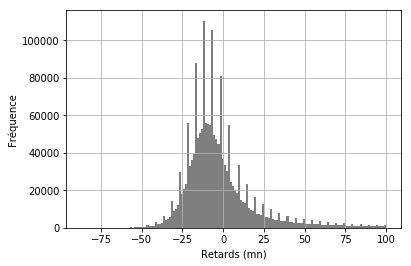

In [25]:
#fig = plt.figure()

ax = (df_delay_digit[df_delay_digit['ARR_DELAY']<=100])['ARR_DELAY'].hist(color='k', alpha=0.5, bins=150)

z_ = ax.set(xlabel='Retards (mn)')
z_ = ax.set(ylabel='Fréquence')


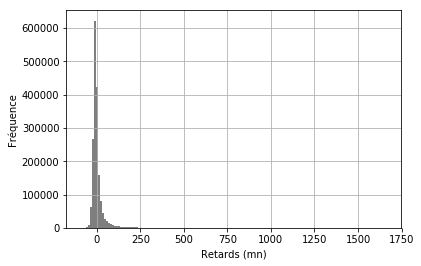

In [26]:
ax = df_delay_digit['ARR_DELAY'].hist(color='k', alpha=0.5, bins=150)

z_ = ax.set(xlabel='Retards (mn)')
z_ = ax.set(ylabel='Fréquence')


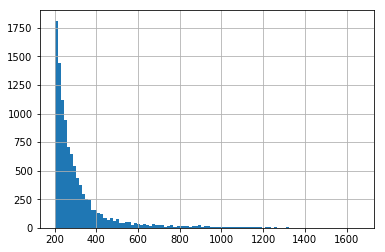

In [27]:
ser_filter = df_delay_digit['ARR_DELAY']>200                                                       
ser  = df_delay_digit['ARR_DELAY']
ser_most = ser[ser_filter]
z_=ser_most.hist(bins=100)

In [28]:
len(df_delay_digit.ORIGIN_CITY_NAME.unique()),len(df_delay_digit.DEST_CITY_NAME.unique())
df_delay_digit.columns

Index(['CRS_DEP_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'AIRLINE_ID',
       'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'DISTANCE',
       'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ORIGIN_CLIMAT', 'DEST_CLIMAT'],
      dtype='object')

 ## <font color='blue'>Frequentation des aéroports</font>

 ## <font color='blue'>Distribution des retards selon les routes</font>

In [29]:
if 'HROUTE' in df_delay_digit.columns :
    del(df_delay_digit['HROUTE'])
df_delay_digit['HROUTE'] = df_delay_digit['ORIGIN_CITY_NAME'] +" / " +df_delay_digit['DEST_CITY_NAME'] \
          +df_delay_digit['ORIGIN_AIRPORT_ID'].apply(lambda x: str(x))\
          +df_delay_digit['DEST_AIRPORT_ID'].apply(lambda x: str(x))

    
df_delay_digit['HROUTE'] = df_delay_digit['HROUTE'].apply(lambda val: ("0x"+hashlib.md5(val.encode()).hexdigest()))

le = preprocessing.LabelEncoder()
le.fit(df_delay_digit['HROUTE'])
df_delay_digit['HROUTE'] = le.transform(df_delay_digit['HROUTE'])

#df_route['ORIGIN_CITY_NAME'] = df_delay_digit['ORIGIN_CITY_NAME'].copy()
#df_route['DEST_CITY_NAME'] = df_delay_digit['DEST_CITY_NAME'].copy()
#df_route['ARR_DELAY'] = df_delay_digit['ARR_DELAY'].copy()

#df_delay_digit['HROUTE'] = df_route['HROUTE'].copy()
#print(df_route.shape)
print(df_delay_digit.shape)
print(df_delay_digit.columns)


(1797433, 17)
Index(['CRS_DEP_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'AIRLINE_ID',
       'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'DISTANCE',
       'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ORIGIN_CLIMAT', 'DEST_CLIMAT',
       'HROUTE'],
      dtype='object')


---------------------------HROUTE---------------------------
Moyenne: 2103.656982485578
Mediane: 2098.0
Modes: 0    216
dtype: int32
Variance: 1445769.4566847319
Ecart:1202.4015372099007


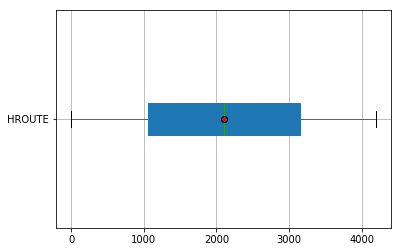

In [30]:
#df_delay_digit.HROUTE.value_counts()
df_boxplot_list_display(df_delay_digit, ['HROUTE'], show_outliers=True )

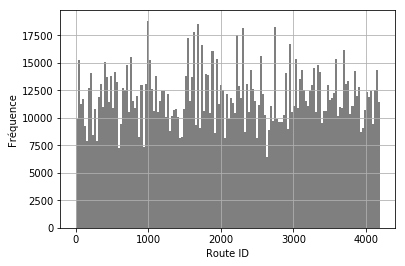

In [32]:
#fig = plt.figure()

ax = df_delay_digit['HROUTE'].hist(color='k', alpha=0.5, bins=150)

z_ = ax.set(xlabel='Route ID')
z_ = ax.set(ylabel='Fréquence')


In [34]:
#df_route.HROUTE.value_counts()
print("Nb de routes : "+str(len(df_delay_digit.HROUTE.unique())))
df_delay_digit.HROUTE.value_counts()
df_delay_digit.loc[0]
i = 0
for route in df_delay_digit.HROUTE.value_counts().index.tolist():
    if i == 30 :
        break
    else :
        print("\nRoute= "+str(route))
        print(df_delay_digit[df_delay_digit.HROUTE==route].iloc[0])
    i+=1
#for i in range(0,10,1)
#len(df_delay_digit[df_delay_digit.HROUTE==216])

Nb de routes : 4192

Route= 216
CRS_DEP_TIME                      1650
ORIGIN_AIRPORT_ID                14771
DEST_AIRPORT_ID                  12892
ORIGIN_CITY_NAME     San Francisco, CA
DEST_CITY_NAME         Los Angeles, CA
ARR_DELAY                           34
AIRLINE_ID                       19805
MONTH                                1
DAY_OF_MONTH                         1
DAY_OF_WEEK                          5
CARRIER                             AA
DISTANCE                           337
ORIGIN_STATE_ABR                    CA
DEST_STATE_ABR                      CA
ORIGIN_CLIMAT                        6
DEST_CLIMAT                          6
HROUTE                             216
Name: 1316, dtype: object

Route= 1601
CRS_DEP_TIME                      1400
ORIGIN_AIRPORT_ID                12892
DEST_AIRPORT_ID                  14771
ORIGIN_CITY_NAME       Los Angeles, CA
DEST_CITY_NAME       San Francisco, CA
ARR_DELAY                          -20
AIRLINE_ID                      

In [36]:
city = "New York, NY"
df_delay_digit[df_delay_digit.DEST_CITY_NAME==city].sample(2)

,CRS_DEP_TIME,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_CITY_NAME,ARR_DELAY,AIRLINE_ID,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,DISTANCE,ORIGIN_STATE_ABR,DEST_STATE_ABR,ORIGIN_CLIMAT,DEST_CLIMAT,HROUTE
261396,1858.0,14027,12953,"West Palm Beach/Palm Beach, FL","New York, NY",13.0,19790,1,13,3,DL,1035.0,FL,NY,4,3,2994
215842,700.0,13930,12953,"Chicago, IL","New York, NY",-17.0,19977,1,3,7,UA,733.0,IL,NY,3,3,902


### Distribution des retards par route

In [37]:
import numpy
from matplotlib import pyplot

def display_route_distrib(df, list_route) :
    plt.figure(figsize=(10,10))
    for route in list_route :
        df_route = df[df.HROUTE==route]
        df_route = df_route[df_route['ARR_DELAY'] <=60]
        origin_city_name = df_route.iloc[0]['ORIGIN_CITY_NAME']
        dest_city_name = df_route.iloc[0]['DEST_CITY_NAME']
        label = str(route)+" : "+origin_city_name+" --> "+dest_city_name
        pyplot.hist(df_route.ARR_DELAY, bins=48, alpha=0.8, label=label)
        print("Route "+str(route)+" Skew = %0.2F" %df_route.ARR_DELAY.skew())

    pyplot.legend(loc='upper left')
    pyplot.title("Fréquende des retards", color='b', fontsize=14)
    pyplot.show()


Route 216 Skew = 1.04
Route 1601 Skew = 1.06


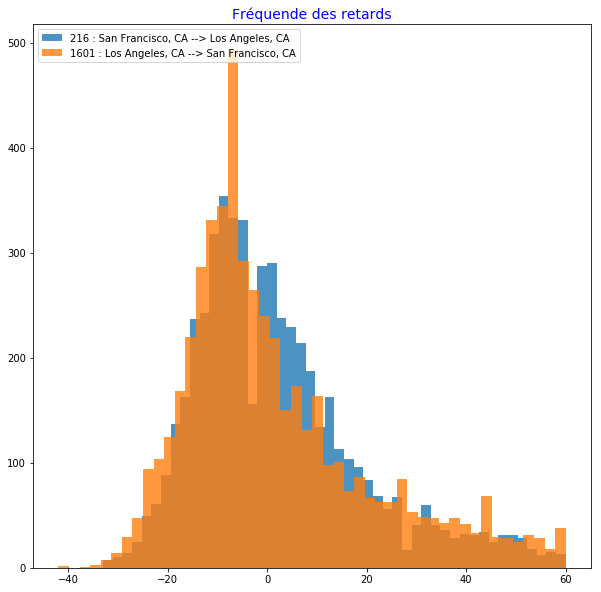

In [38]:
list_route = [216,1601]
display_route_distrib(df_delay_digit, list_route)

Route 2217 Skew = 0.73
Route 36 Skew = 0.79


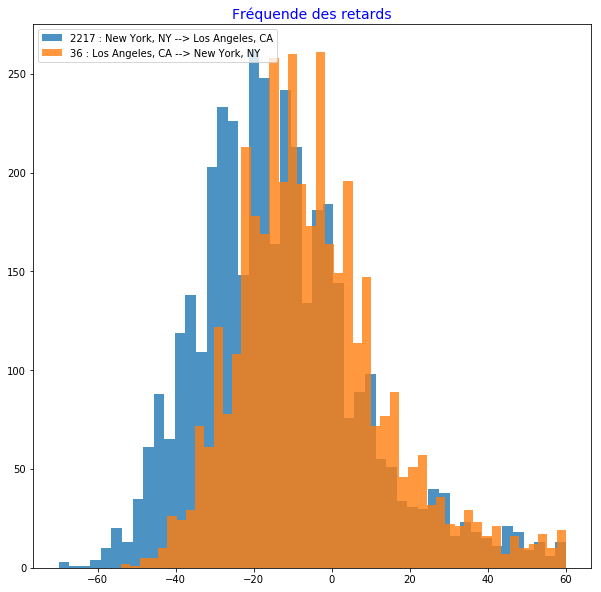

In [40]:
list_route = [2217,36]
display_route_distrib(df_delay_digit, list_route)

Route 1971 Skew = 1.14
Route 2217 Skew = 0.73


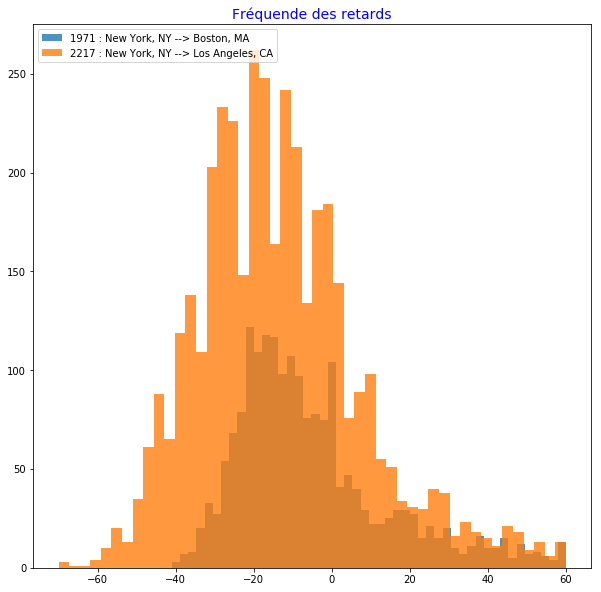

In [41]:
list_route = [1971,2217]
display_route_distrib(df_delay_digit, list_route)

Route 1971 Skew = 1.14
Route 3353 Skew = 1.30


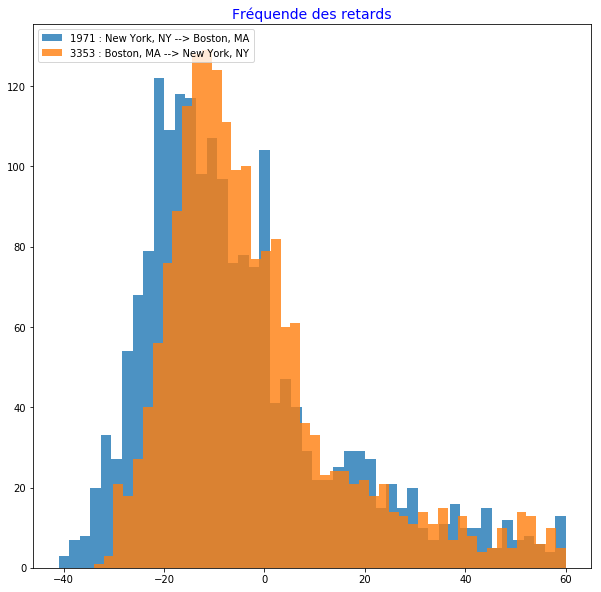

In [42]:
list_route = [1971,3353]
display_route_distrib(df_delay_digit, list_route)

HROUTE : max route frequentations = 216
San Francisco, CA --> Los Angeles, CA
HROUTE : max route frequentations = 2483
Chicago, IL --> Boston, MA
HROUTE : max route frequentations = 1994
St. Louis, MO --> Atlanta, GA


matplotlib.axes._subplots.AxesSubplot

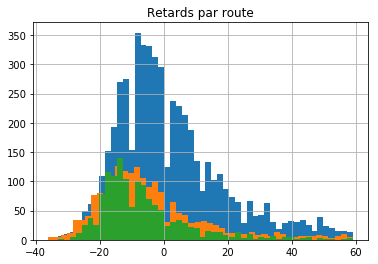

In [43]:
#df_route = pd.concat([df_route, df_delay_digit.ORIGIN_CITY_NAME],axis=0)
df_delay_digit = df_delay_digit[df_delay_digit['ARR_DELAY']<60]
df_delay_digit.sample(3)
for index_route in range(0,300,100) :
    hroute_max = df_delay_digit.HROUTE.value_counts().index[index_route]
    print("HROUTE : max route frequentations = "+str(hroute_max))
    df_route_max = df_delay_digit[df_delay_digit.HROUTE==hroute_max]
    
    origin_city_name = df_route_max.ORIGIN_CITY_NAME.unique()[0]
    dest_city_name = df_route_max.DEST_CITY_NAME.unique()[0]
    print( origin_city_name+" --> "+dest_city_name)
    title = "Retards en fonction des routes"
    axes = df_route_max.ARR_DELAY.hist(bins=50,label=title)

    axes.set_title("Retards par route")
type(axes)

In [44]:
df_delay_digit.columns

Index(['CRS_DEP_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'AIRLINE_ID',
       'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'DISTANCE',
       'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ORIGIN_CLIMAT', 'DEST_CLIMAT',
       'HROUTE'],
      dtype='object')

 ## <font color='blue'>Analyse de l'activité</font>

1 1439


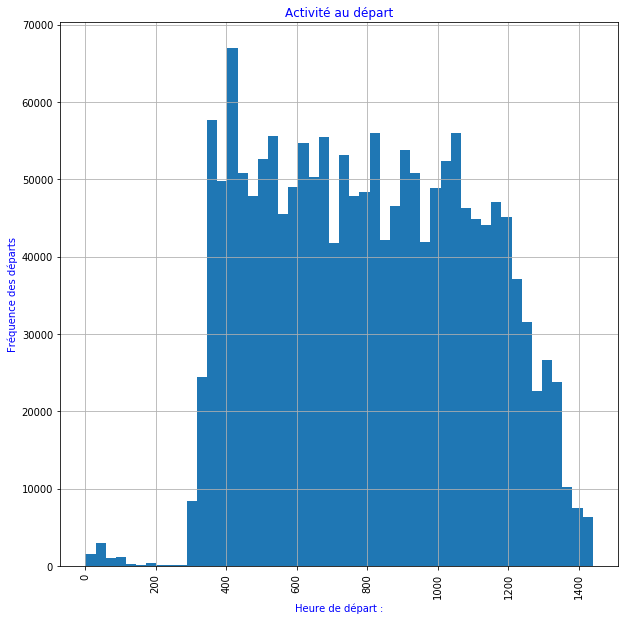

In [45]:
import LinearDelayPredictor
from matplotlib import pyplot as py
df_crs_dep_time = pd.DataFrame()
df_crs_dep_time['CRS_DEP_TIME'] = df_delay_digit.CRS_DEP_TIME.copy()
df_crs_dep_time = df_crs_dep_time.CRS_DEP_TIME.apply(LinearDelayPredictor.cb_convert_floathour_to_mn)
print(df_crs_dep_time.min(),df_crs_dep_time.max())
if True :
    title = "Activité au départ"
    xlabel = "Heure de départ :"
    ylabel = "Fréquence des départs"

    ser_hist(df_crs_dep_time,title,xlabel, ylabel,param_bins=50, param_font_size=12, param_rotation=90, figsize=(10,10))
else : 
    df_crs_dep_time.hist(bins=150, figsize=(10,10))

In [46]:
print(df_crs_dep_time.sample(2))

430744    510
134074    727
Name: CRS_DEP_TIME, dtype: int64


In [47]:
df_crs_dep_time = df_crs_dep_time.apply(LinearDelayPredictor.convert_mn_to_hour)
print(df_crs_dep_time.sample(2))

360173    16
253137    15
Name: CRS_DEP_TIME, dtype: int64


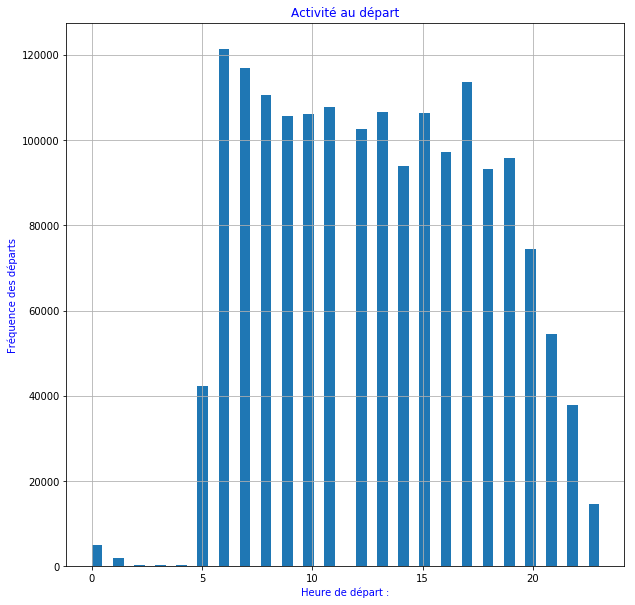

In [48]:
#df_crs_dep_time.hist(bins=48, figsize=(10,10))
title = "Activité au départ"
xlabel = "Heure de départ :"
ylabel = "Fréquence des départs"

ser_hist(df_crs_dep_time,title,xlabel, ylabel,param_bins=48, param_font_size=12, param_rotation=0, figsize=(10,10))


------------------------CRS_DEP_TIME------------------------
Moyenne: 12.964922161340864
Mediane: 13.0
Modes: 0    6
dtype: int64
Variance: 23.79846519692588
Ecart:4.878367062545199


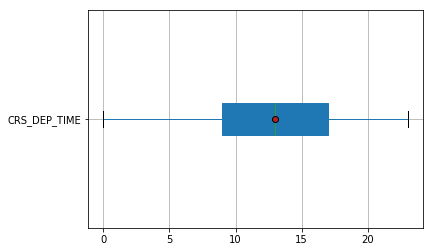

In [49]:
df_boxplot_list_display(pd.DataFrame(df_crs_dep_time), ['CRS_DEP_TIME'], show_outliers=True ) 

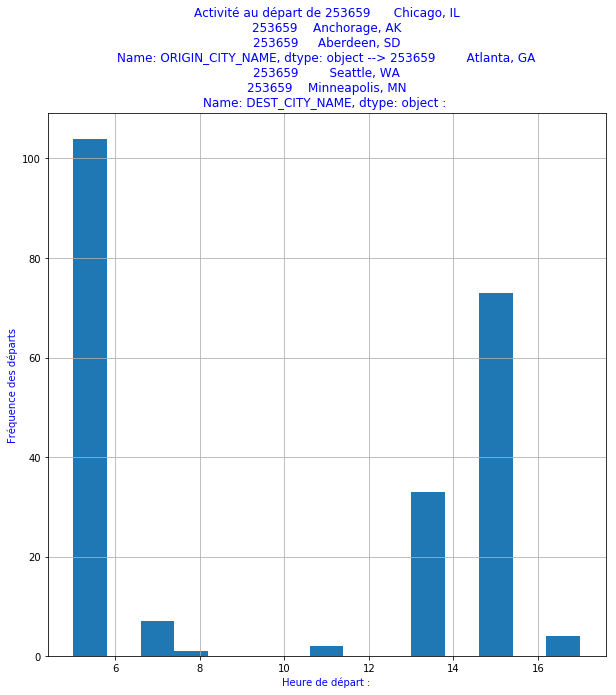

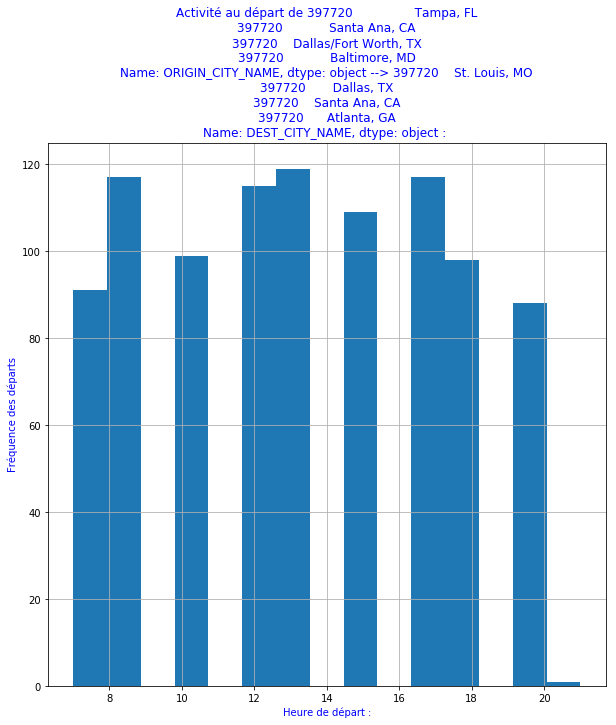

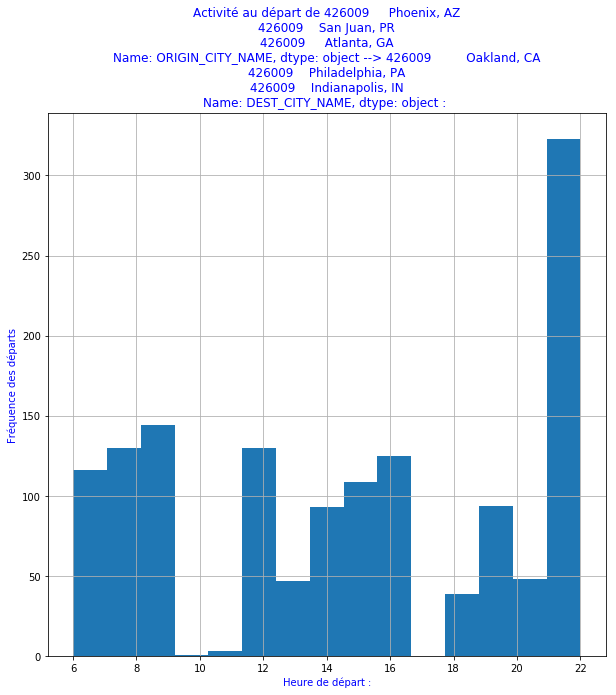

In [50]:
ser_list = df_delay_digit.HROUTE.sample(3)
xlabel = "Heure de départ :"
ylabel = "Fréquence des départs"
for index in ser_list.index :
    route = ser_list.loc[index]
    origin = df_delay_digit.ORIGIN_CITY_NAME.loc[index]
    dest = df_delay_digit.DEST_CITY_NAME.loc[index]
    ser = df_delay_digit[df_delay_digit['HROUTE']==route].CRS_DEP_TIME
    ser = ser.apply(LinearDelayPredictor.cb_convert_floathour_to_mn)
    ser = ser.apply(LinearDelayPredictor.convert_mn_to_hour)
    title = "Activité au départ de "+str(origin)+" --> "+str(dest)+" : "
    ser_hist(ser,title,xlabel, ylabel,param_bins=15, param_font_size=12, param_rotation=0, figsize=(10,10))


In [51]:
ser_list = df_delay_digit.HROUTE.sample(3)

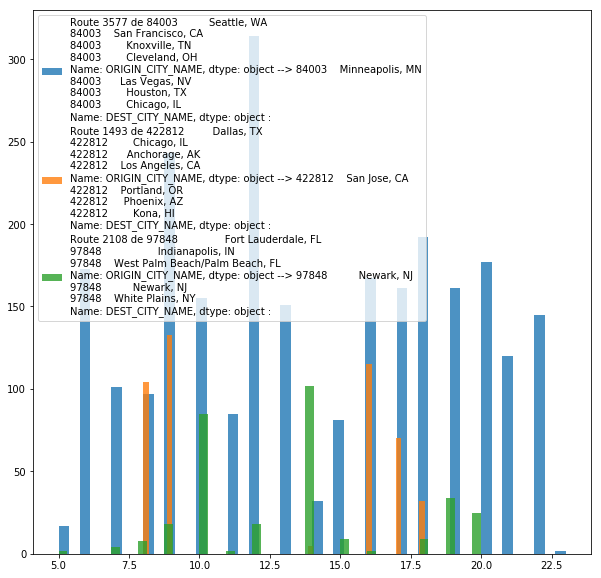

In [52]:
import numpy
from matplotlib import pyplot

pyplot.figure(figsize=(10,10))
xlabel = "Heure de départ"
ylabel = "Fréquence des départs"
for index in ser_list.index :
    route = ser_list.loc[index]
    origin = df_delay_digit.ORIGIN_CITY_NAME.loc[index]
    dest = df_delay_digit.DEST_CITY_NAME.loc[index]
    ser = df_delay_digit[df_delay_digit['HROUTE']==route].CRS_DEP_TIME
    ser = ser.apply(LinearDelayPredictor.cb_convert_floathour_to_mn)
    ser = ser.apply(LinearDelayPredictor.convert_mn_to_hour)
    
    label = "Route "+str(route)+" de "+str(origin)+" --> "+str(dest)+" : "
    #ser_hist(ser,title,xlabel, ylabel,param_bins=15, param_font_size=12, param_rotation=0, figsize=(10,10))
    pyplot.hist(ser, bins=48, alpha=0.8, label=label)
pyplot.legend(loc='upper left')

pyplot.show()


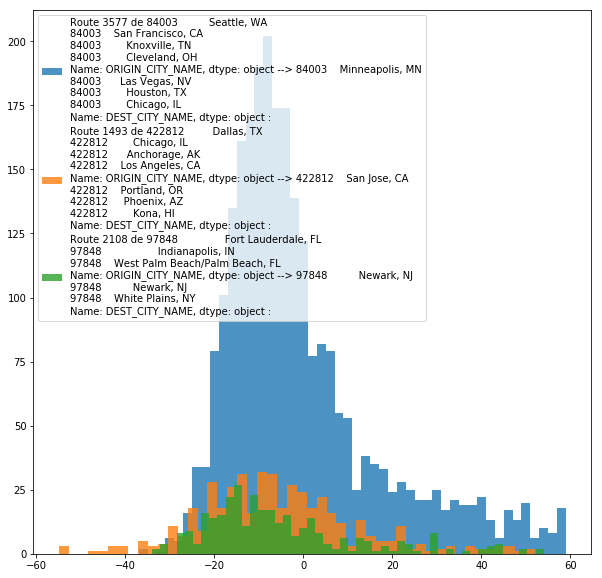

In [53]:
import numpy
from matplotlib import pyplot

pyplot.figure(figsize=(10,10))
xlabel = "Heure de départ"
ylabel = "Fréquence des départs"
for index in ser_list.index :
    route = ser_list.loc[index]
    origin = df_delay_digit.ORIGIN_CITY_NAME.loc[index]
    dest = df_delay_digit.DEST_CITY_NAME.loc[index]
    ser = df_delay_digit[df_delay_digit['HROUTE']==route].ARR_DELAY
    #ser = ser.apply(LinearDelayPredictor.cb_convert_floathour_to_mn)
    #ser = ser.apply(LinearDelayPredictor.convert_mn_to_hour)
    
    label = "Route "+str(route)+" de "+str(origin)+" --> "+str(dest)+" : "
    #ser_hist(ser,title,xlabel, ylabel,param_bins=15, param_font_size=12, param_rotation=0, figsize=(10,10))
    pyplot.hist(ser, bins=48, alpha=0.8, label=label)
pyplot.legend(loc='upper left')

pyplot.show()


In [54]:
df_display_linear_regression_from_list(pd.DataFrame(ser), 'ARR_DELAY',['CRS_DEP_TIME'])

(318, 1)


 ## <font color='blue'>Analyse de la fréquentation aéroports</font>

 ## <font color='blue'>Aeroports les moins frequentés</font>

 ## <font color='blue'>Retard moyen par aeroport les plus fréquentés</font>

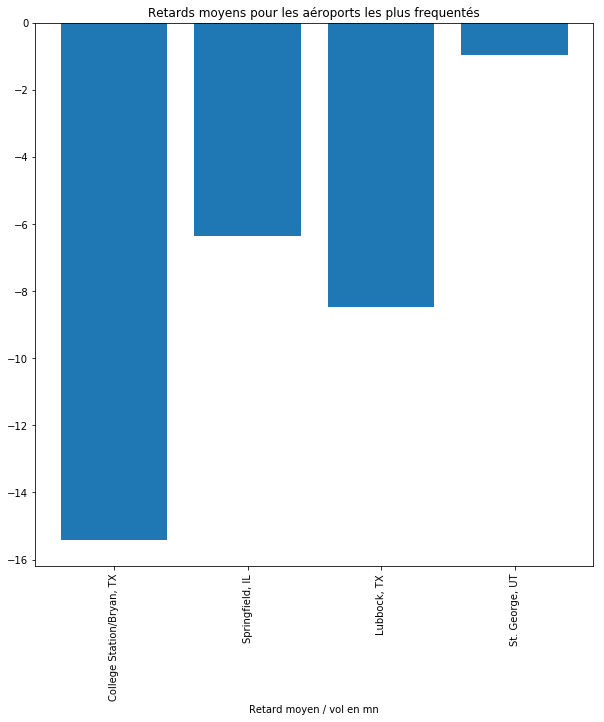

In [59]:
#----------------------------------------------------------------------------
# Aggregation dans un dataframe des Series des aeroports les plus frequentés
#----------------------------------------------------------------------------
df_most= pd.DataFrame()
for col in ser_most.index.tolist() :
    df_most = pd.concat([df_most,df_delay_digit[df_delay_digit['ORIGIN_AIRPORT_ID']==col]],axis=0)


#----------------------------------------------------------------------------
# Les données sont groupées par aeroport, le retard moyen est calculé par 
# aeroport.
#----------------------------------------------------------------------------
df_most.groupby('ORIGIN_AIRPORT_ID')
ser = df_most.groupby(['ORIGIN_AIRPORT_ID'])['ARR_DELAY'].mean()
#print(ser)
ser.sort_values(inplace=True)
#print(ser)
x= ser.index.values

#----------------------------------------------------------------------------
# Recuperation du nom de l'aeroport en fonction de son code.
#----------------------------------------------------------------------------
x_list_origin = p4_df_get_listName_from_listCode(df_most,x,ref_code='ORIGIN_AIRPORT_ID')

#----------------------------------------------------------------------------
# Affichage du diagramme
#----------------------------------------------------------------------------
y = ser.values
#y = ser.sort_values(inplace=False).values
#print(y)
plt.figure(figsize=(10,10))
plt.title("Retards moyens pour les aéroports les plus frequentés")
plt.bar(x_list_origin, height= y)
plt.xlabel("Aeroports")
plt.xlabel("Retard moyen / vol en mn")
plt.xticks(x_list_origin,rotation=90);



 ## <font color='blue'>Distribution des retards selon les aeroports</font>
 * Calcul, par aéroport, des retards moyens
 * Selection des données en fonction des valeurs remarquables de la boxplot de la moyenne des retards

In [60]:
#----------------------------------------------------------------------------
# Calcul de la moyenne des retards sur le jeux de données
#----------------------------------------------------------------------------
delay_mean = df_delay_digit['ARR_DELAY'].mean()
print("Retard moyen global = "+str(delay_mean))
q1,q3,zmin, zmax = df_boxplot_limits(df_delay_digit , 'ARR_DELAY')
print("Valeur moustache inférieure = "+str(zmin))
print("Valeur quantile 1 = "+str(q1))
print("Valeur quantile 3 = "+str(q3))
print("Valeur moustache supérieure = "+str(zmax))

Retard moyen global = -4.849617196030372
Valeur moustache inférieure = -43.0
Valeur quantile 1 = -16.0
Valeur quantile 3 = 2.0
Valeur moustache supérieure = 29.0


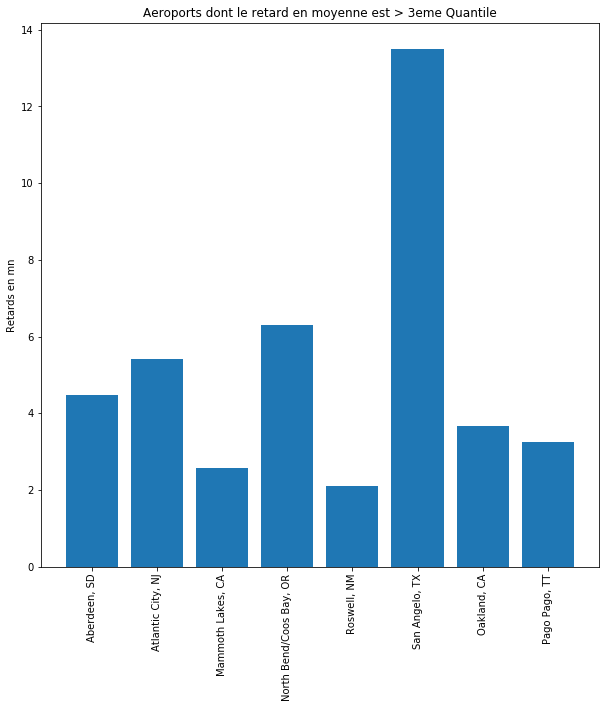

In [61]:
criteria = q3
#----------------------------------------------------------------------------
# Les données sont groupées par aeroport, le retard moyen est calculé par 
# aeroport.
#----------------------------------------------------------------------------
ser = df_delay_digit.groupby(['ORIGIN_AIRPORT_ID'])['ARR_DELAY'].mean()

#----------------------------------------------------------------------------
# Calcul du filtre
#----------------------------------------------------------------------------
ser_filetered = ser>criteria

#----------------------------------------------------------------------------
# Application du filtre
#----------------------------------------------------------------------------
ser = ser[ser_filetered]

#----------------------------------------------------------------------------
# Affichage sous forme d'histogramme
#----------------------------------------------------------------------------
plt.figure(figsize=(10,10))
parameter_rotation = 90
x_code = ser.index.values

x_label = p4_df_get_listName_from_listCode(df_delay_digit,list(x_code),ref_code='ORIGIN_AIRPORT_ID')
y = ser.values
plt.bar(x_label, height= y)
plt.ylabel("Retards en mn")
plt.xticks(x_label,rotation=parameter_rotation);
z_=plt.title("Aeroports dont le retard en moyenne est > 3eme Quantile")    

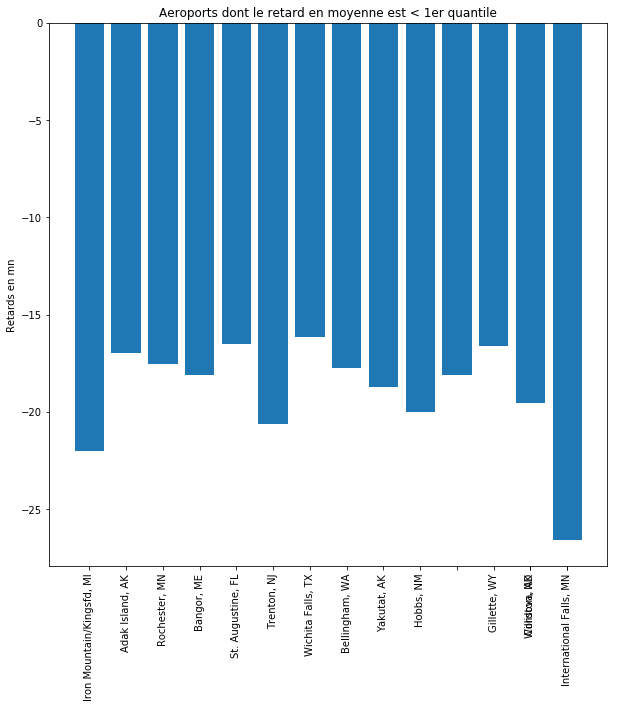

In [62]:
criteria = q1
#----------------------------------------------------------------------------
# Les données sont groupées par aeroport, le retard moyen est calculé par 
# aeroport.
#----------------------------------------------------------------------------
ser = df_delay_digit.groupby(['ORIGIN_AIRPORT_ID'])['ARR_DELAY'].mean()

#----------------------------------------------------------------------------
# Calcul du filtre
#----------------------------------------------------------------------------
ser_filetered = ser<criteria

#----------------------------------------------------------------------------
# Application du filtre
#----------------------------------------------------------------------------
ser = ser[ser_filetered]

#----------------------------------------------------------------------------
# Affichage sous forme d'histogramme
#----------------------------------------------------------------------------
plt.figure(figsize=(10,10))
parameter_rotation = 90
x_code = ser.index.values

x_label = p4_df_get_listName_from_listCode(df_delay_digit,list(x_code),ref_code='ORIGIN_AIRPORT_ID')
y = ser.values
plt.bar(x_label, height= y)
plt.ylabel("Retards en mn")
plt.xticks(x_label,rotation=parameter_rotation);
z_=plt.title("Aeroports dont le retard en moyenne est < 1er quantile")    

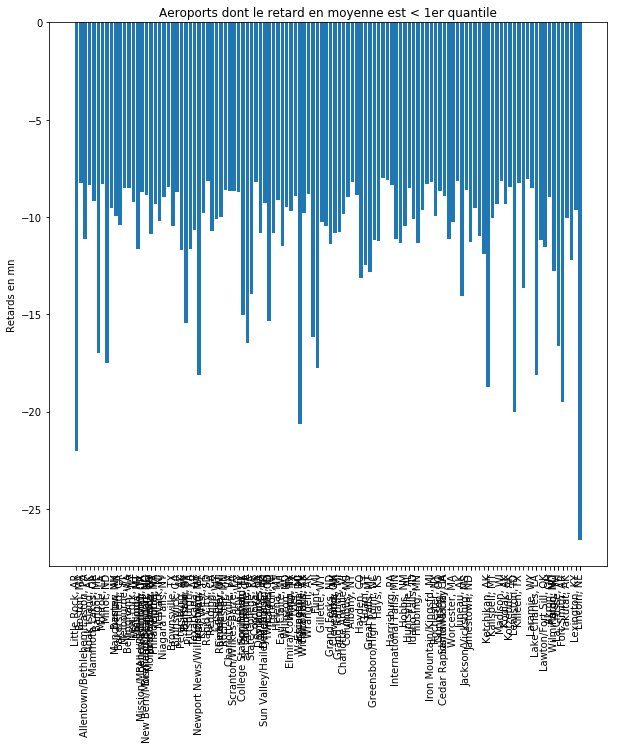

In [63]:
criteria = df_delay_digit['ARR_DELAY'].median()

#----------------------------------------------------------------------------
# Les données sont groupées par aeroport, le retard moyen est calculé par 
# aeroport.
#----------------------------------------------------------------------------
ser = df_delay_digit.groupby(['ORIGIN_AIRPORT_ID'])['ARR_DELAY'].mean()

#----------------------------------------------------------------------------
# Calcul du filtre
#----------------------------------------------------------------------------
ser_filetered = ser<criteria
#----------------------------------------------------------------------------
# Application du filtre
#----------------------------------------------------------------------------
ser = ser[ser_filetered]

#----------------------------------------------------------------------------
# Affichage sous forme d'histogramme
#----------------------------------------------------------------------------
plt.figure(figsize=(10,10))
parameter_rotation = 90
x_code = ser.index.values

x_label = p4_df_get_listName_from_listCode(df_delay_digit,list(x_code),ref_code='ORIGIN_AIRPORT_ID')
y = ser.values
plt.bar(x_label, height= y)
plt.ylabel("Retards en mn")
plt.xticks(x_label,rotation=parameter_rotation);
z_=plt.title("Aeroports dont le retard en moyenne est < 1er quantile")    

 ## <font color='blue'>Analyse des routes dans le modèle</font>

In [64]:
import hashlib
from decimal import Decimal

df_route = df_delay_digit[['ORIGIN_CITY_NAME','DEST_CITY_NAME']]
df_route['HROUTE'] = df_delay_digit['ORIGIN_CITY_NAME'] + df_delay_digit['DEST_CITY_NAME']

df_route['HROUTE'] = df_route['HROUTE'].apply(lambda val: ("0x"+hashlib.md5(val.encode()).hexdigest()))
le = preprocessing.LabelEncoder()
le.fit(df_route['HROUTE'])
df_route['HROUTE'] = le.transform(df_route['HROUTE'])

if is_df_with_route is True :
    df_delay_digit['HROUTE'] = df_route['HROUTE'].copy()

/home/bangui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/bangui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/bangui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [66]:
import hashlib
from decimal import Decimal


df_delay_digit['STR_ORIGIN_AIRPORT_ID'] = df_delay_digit['ORIGIN_AIRPORT_ID'].apply(lambda x: str(x))
df_delay_digit['STR_DEST_AIRPORT_ID'] = df_delay_digit['DEST_AIRPORT_ID'].apply(lambda x: str(x))

ser_route = pd.Series((df_delay_digit['ORIGIN_CITY_NAME'] \
                     + df_delay_digit['DEST_CITY_NAME']\
                     + df_delay_digit['STR_ORIGIN_AIRPORT_ID']\
                     + df_delay_digit['STR_DEST_AIRPORT_ID']),index=df_delay_digit.index)

ser_route = ser_route.apply(lambda val: ("0x"+hashlib.md5(val.encode()).hexdigest()))

del(df_delay_digit['STR_ORIGIN_AIRPORT_ID'])
del(df_delay_digit['STR_DEST_AIRPORT_ID'])

le = preprocessing.LabelEncoder()
le.fit(ser_route)
ser_route = (le.transform(ser_route)).copy()


df_delay_digit['HROUTE'] = ser_route.copy()


In [67]:
printmd(df_route['HROUTE'].shape)

<p><font color='green'>**(1709883,)**</font></p>

In [68]:
printmd("Nombre de routes du modèle= "+str(len(df_route.HROUTE.unique())))

<p><font color='green'>**Nombre de routes du modèle= 3855**</font></p>

In [69]:
hroute_freq_max = df_route.HROUTE.value_counts(ascending=False).index[0]
hroute_freq_min = df_route.HROUTE.value_counts(ascending=True).index[0]
hroute_freq_mean = df_route.HROUTE.value_counts(ascending=True).index[1500]
hroute_freq_min,hroute_freq_max,hroute_freq_mean

origin_max_city_name = df_route[df_route.HROUTE==hroute_freq_max].ORIGIN_CITY_NAME.unique()
dest_max_city_name = df_route[df_route.HROUTE==hroute_freq_max].DEST_CITY_NAME.unique()

origin_min_city_name = df_route[df_route.HROUTE==hroute_freq_min].ORIGIN_CITY_NAME.unique()
dest_min_city_name = df_route[df_route.HROUTE==hroute_freq_min].DEST_CITY_NAME.unique()

origin_mean_city_name = df_route[df_route.HROUTE==hroute_freq_mean].ORIGIN_CITY_NAME.unique()
dest_mean_city_name = df_route[df_route.HROUTE==hroute_freq_mean].DEST_CITY_NAME.unique()


print("Route la plus fréquentée : "+origin_max_city_name+" --> "+dest_max_city_name)
print("Route la moins fréquentée : "+origin_min_city_name+" --> "+dest_min_city_name)
print("Route moyenemant fréquentée : "+origin_mean_city_name+" --> "+dest_mean_city_name)

['Route la plus fréquentée : San Francisco, CA --> Los Angeles, CA']
['Route la moins fréquentée : Miami, FL --> Columbus, OH']
['Route moyenemant fréquentée : Hancock/Houghton, MI --> Chicago, IL']


In [70]:
df_route.HROUTE.describe()

count    1.709883e+06
mean     1.957688e+03
std      1.113366e+03
min      0.000000e+00
25%      1.001000e+03
50%      1.945000e+03
75%      2.958000e+03
max      3.854000e+03
Name: HROUTE, dtype: float64

In [71]:
flight_frequency_threshold = 0
ser_most_origin = \
p4_df_get_feature_count_from_threshold(df_delay_digit,'ORIGIN_AIRPORT_ID'\
                                       ,flight_frequency_threshold, direction=1)
ser_most_dest = \
p4_df_get_feature_count_from_threshold(df_delay_digit,'DEST_AIRPORT_ID',flight_frequency_threshold, direction=1)
ser_most_origin.sort_values(ascending=False, inplace=True)
ser_most_dest.sort_values(ascending=False, inplace=True)


 ## <font color='blue'>Variation des retards en fonction d'une route et d'un paramètre additionnel</font>

### <font color='blue'>Variation des retards en fonction des transporteurs</font>

### <font color='blue'>Variation des retards en fonction des dates de vol</font>

### <font color='blue'>Variation des retards en fonction du jour de la semaine</font>

**Code,Description :**

* "1","Monday"
* "2","Tuesday"
* "3","Wednesday"
* "4","Thursday"
* "5","Friday"
* "6","Saturday"
* "7","Sunday"
* "9","Unknown"

### <font color='blue'>Variation des retards en fonction du jour dans le mois</font>

### <font color='blue'>Variation des retards en fonction l'heure de départ programmé</font>

In [ ]:
p4_df_plot_delay_route_parameter(df_delay_digit,route,'CRS_DEP_TIME')

 ## <font color='blue'>Analyse de la distribution des variables</font>

In [ ]:
df_delay_digit.columns

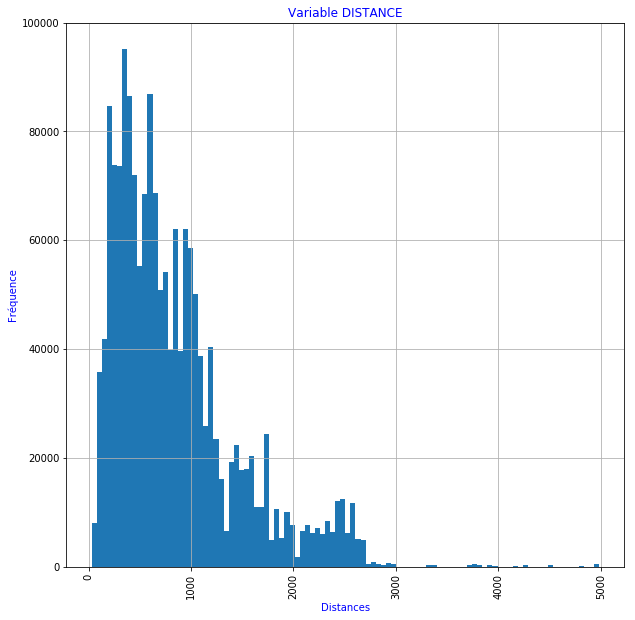

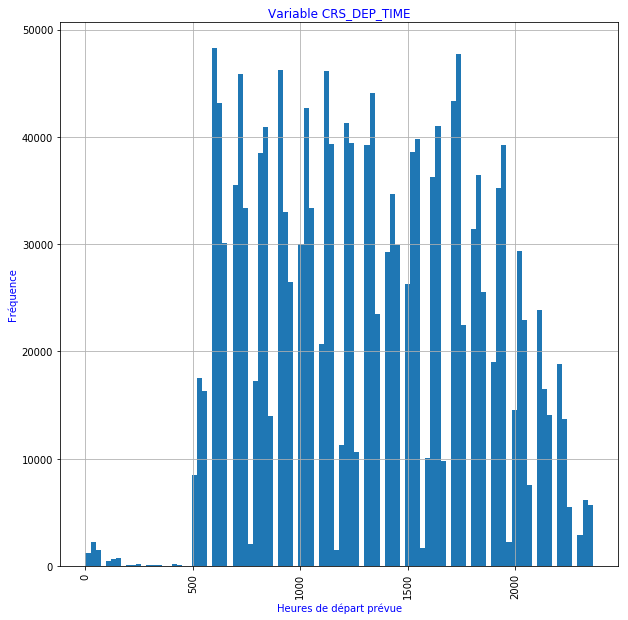

TypeError: cannot perform reduce with flexible type

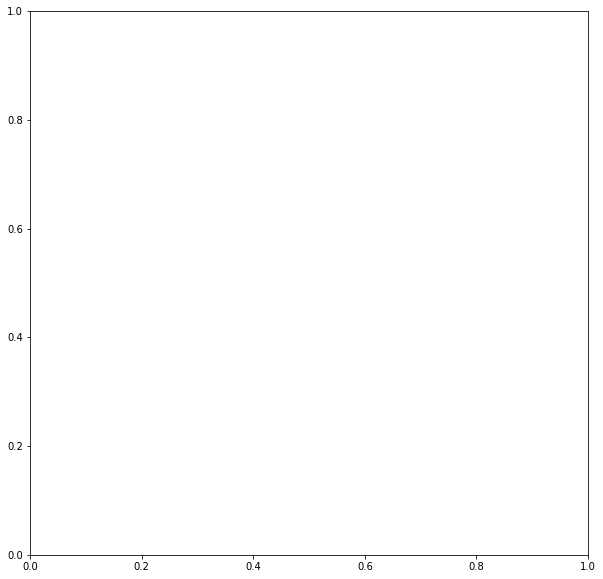

In [76]:
dict_parameter = dict()
list_col_time = ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID',
       'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'DISTANCE']


if 'DISTANCE' in df_delay_digit :
        dict_parameter['DISTANCE'] = ['Variable DISTANCE', 'Distances','Fréquence']
    
if 'CRS_ELAPSED_TIME' in df_delay_digit :
    dict_parameter['CRS_ELAPSED_TIME'] = ['Variable CRS_ELAPSED_TIME','Temps de vol prévue (mn)','Fréquence']

if 'CRS_DEP_TIME' in df_delay_digit :
    dict_parameter['CRS_DEP_TIME'] = ['Variable CRS_DEP_TIME','Heures de départ prévue','Fréquence']

if 'CRS_DEP_TIME' in df_delay_digit :
    dict_parameter['DAY_OF_MONTH'] = ['Variable DAY_OF_MONTH','Jours du mois','Fréquence']

if 'DAY_OF_WEEK' in df_delay_digit :
    dict_parameter['DAY_OF_WEEK'] = ['Variable DAY_OF_WEEK','Jours de la semaine','Fréquence']

if 'ARR_DELAY' in df_delay_digit :
    dict_parameter['ARR_DELAY'] = ['Variable ARR_DELAY','Retards a l\'arrivée','Fréquence']

if 'AIRLINE_ID' in df_delay_digit :
    dict_parameter['AIRLINE_ID'] = ['Variable AIRLINE_ID','Compagnies','Fréquence']

if 'ORIGIN_AIRPORT_ID' in df_delay_digit :
    dict_parameter['ORIGIN_AIRPORT_ID'] = ['Variable ORIGIN_AIRPORT_ID','Aéroports de départ','Fréquence']

if 'DEST_AIRPORT_ID' in df_delay_digit :
    dict_parameter['DEST_AIRPORT_ID'] = ['Variable DEST_AIRPORT_ID','Aéroports d\'arrivée','Fréquence']

for key, list_param_display in dict_parameter.items() :
    ser_hist(df_delay_digit[key],list_param_display[0],list_param_display[1], list_param_display[2])

**Similarités entre les distributions des variables obervées : **

* *ORIGIN_AIRPORT_ID et DEST_AIRPORT_ID*
* *CRS_DEP_TIME et CRS_ARR_TIME*

## <font color='blue'> PCA  </font>

In [ ]:
df_delay_digit_corr = df_delay_digit.corr()
f, ax = plt.subplots(figsize=(10, 10))
_z = sns.heatmap(df_delay_digit_corr, annot=False)

In [ ]:
if 'FL_DATE' in df_delay_digit :
    df_delay_digit.FL_DATE.unique()

# <font color='blues'>Regressions linéaires</font>

In [ ]:
df_delay_digit.columns

## <font color='blue'>Choix des variables</font>

**Variable cible (y):**
* ARR_DELAY

**Choix des variables (X):**
* MONTH
* DAY_OF_MONTH
* DAY_OF_WEEK
* AIRLINE_ID
* ORIGIN_AIRPORT_ID
* DEST_AIRPORT_ID
* CRS_DEP_TIME
* CRS_ELAPSED_TIME

**Variables quantitatives:**
* CRS_DEP_TIME
* CRS_ARR_TIME pour rendre transparent les fuseaux horraires.

**Encodage des variables :**
* MONTH
* AIRLINE_ID
* DAY_OF_MONTH
* DAY_OF_WEEK
* ORIGIN_AIRPORT_ID
* DEST_AIRPORT_ID


## <font color='blue'>Hypothéses sous-jacentes à la regression linéaire</font>

### <font color='blue'>Hypothèse IID </font>
* Les couples (Xi,yi) sont susceptibles d'être indépendants les uns des autres
* Toutes les variables ont une probabilité de distribution identiques

In [ ]:
# Le mois 
list_var = ['MONTH','AIRLINE_ID','DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT_ID'\
                      , 'DEST_AIRPORT_ID','CRS_DEP_TIME','DISTANCE','ARR_DELAY']
df_corr = df_delay_digit[list_var].corr()

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
_z = sns.heatmap(df_corr, annot=False)

In [ ]:
df_delay_digit_save = df_delay_digit.copy()

## <font color='blue'>Construction du modèle numérique des données</font>

In [ ]:
df_delay_digit = df_delay_digit_save.copy()
df_delay_digit_save.columns

**Discrimination du retard**

In [ ]:
print(df_delay_digit.shape)

for key in dict_delay_splitted.keys() :
    if dict_delay_splitted[key] == 1 :
        if key == 'past' :
            df_delay_digit = df_delay_digit[df_delay_digit['ARR_DELAY'] <=0]
            break
        if key == 'futur' :
            df_delay_digit = df_delay_digit[df_delay_digit['ARR_DELAY'] >0]
            break

print(df_delay_digit.shape)            

**Modele par route**

In [77]:

if is_route_in_model is True :
    origin_city_name = origin_max_city_name[0]
    dest_city_name = dest_max_city_name[0]
    printmd("Modele pour la route "+origin_city_name+" --> "+ dest_city_name)

    print(df_delay_digit.shape)
    df_delay_digit = df_delay_digit[df_delay_digit['ORIGIN_CITY_NAME']==origin_city_name]
    df_delay_digit = df_delay_digit[df_delay_digit['DEST_CITY_NAME']==dest_city_name]
    print(df_delay_digit.shape)
else :
   print(df_delay_digit.shape)

(1709883, 17)


In [ ]:
df_delay_digit.AIRLINE_ID.unique()

**Filtrage par transporteur**

In [ ]:
if is_carrier_model is True :
    
    print(df_delay_digit.shape)
    df_delay_digit = df_delay_digit[df_delay_digit['AIRLINE_ID']==19790]
    del(df_delay_digit['AIRLINE_ID'])
    print(df_delay_digit.shape)
else :
    pass


**Filtrage des outliers sur les retards**

In [78]:
start=0
end = 0
if is_delay_outlier_removed is True :
    zmin, zmax = df_boxplot_min_max(df_delay_digit , 'ARR_DELAY')

    print(df_delay_digit.shape)
    start = df_delay_digit.shape[0]
    df_delay_digit = df_delay_digit[df_delay_digit['ARR_DELAY']<zmax]
    df_delay_digit = df_delay_digit[df_delay_digit['ARR_DELAY']>zmin]
    print(df_delay_digit.shape)
    end = df_delay_digit.shape[0]
    print("Pourcent valeurs outliers écrêtées : %0.2f" %((start-end)*100/start))
else :
    pass


(1709883, 17)
(1611573, 17)
Pourcent valeurs outliers écrêtées : 5.75


### <font color='blue'>Vecteur cible</font>

In [ ]:
df_delay_digit.sample(10)

In [79]:
# --------------------------------------------------
# Variable etiquette
# --------------------------------------------------
list_target = ['ARR_DELAY']
y = df_delay_digit[list_target].values
y.min(),y.max()

(-42.0, 28.0)

### <font color='blue'>Variables de référence</font>

In [80]:
list_ref = ['ORIGIN_CITY_NAME','DEST_CITY_NAME']
#df_ref = df_delay_digit[list_ref]

### <font color='blue'>Variables quantitatives</font>

In [81]:
df_delay_digit.columns

Index(['CRS_DEP_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'AIRLINE_ID',
       'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'DISTANCE',
       'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ORIGIN_CLIMAT', 'DEST_CLIMAT',
       'HROUTE'],
      dtype='object')

In [82]:
list_quantitative = ['CRS_DEP_TIME']
# ------------------------------------------------
# Recuperation du tableau de données quantitatives
# ------------------------------------------------
X_quantitative = df_delay_digit[list_quantitative].values

# ------------------------------------------------
# Conversion du type entier en float
# ------------------------------------------------
X_quantitative = X_quantitative.astype(float)

# ------------------------------------------------
# Nombre de colonnes pour les données qualitatives
# ------------------------------------------------
col_quant_count = X_quantitative.shape[1]
printmd(col_quant_count)

<p><font color='green'>**1**</font></p>

In [83]:
X_quantitative[:,0:col_quant_count].shape

(1611573, 1)

### <font color='blue'>Standardisation des données numériques</font>

In [84]:
std_scale       = preprocessing.StandardScaler().fit(X_quantitative)
X_quantitative_std    = std_scale.transform(X_quantitative)
X_quantitative_std.min(),X_quantitative_std.max()

(-2.6853961910313457, 2.135885503342952)

### <font color='blue'>Variables qualitatives et encodage</font>

**Construction de la liste qualitative**

In [85]:
list_qualitative_excluded = list()
#----------------------------------------------------------------------------
# Les aeroports d'origine et de destination sont exclus du modèle car 
# remplacés par la variable HROUTE
#----------------------------------------------------------------------------
if 'HROUTE' in df_delay_digit.columns :
    list_qualitative_excluded = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']

#----------------------------------------------------------------------------
# Les aeroports d'origine et de destination sont exclus du modèle car 
# le dataframe a été filtré par ORIGIN_AIRPORT_ID et DEST_AIRPORT_ID de 
# route.
#----------------------------------------------------------------------------
if is_route_in_model is True :
    list_qualitative_excluded = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']

**Construction de la liste des variables qualitatives**

In [86]:
#----------------------------------------------------------------------------
# Construction de la liste des variables qualitatives.
#----------------------------------------------------------------------------
list_qualitative_excluded.append('DISTANCE')
list_qualitative_excluded.append('FL_NUM')
list_qualitative_excluded.append('CARRIER')
list_qualitative = list()
for col in df_delay_digit.columns :
    if col not in list_target :
        if col not in list_quantitative:
            if col not in list_ref :
                if col not in list_qualitative_excluded :
                    list_qualitative.append(col)

print(list_ref)
print(list_qualitative)
print(list_target)
print(list_quantitative)
print(list_qualitative_excluded)
print(df_delay_digit.columns)
print(df_delay_digit.shape)


['ORIGIN_CITY_NAME', 'DEST_CITY_NAME']
['AIRLINE_ID', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ORIGIN_CLIMAT', 'DEST_CLIMAT', 'HROUTE']
['ARR_DELAY']
['CRS_DEP_TIME']
['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DISTANCE', 'FL_NUM', 'CARRIER']
Index(['CRS_DEP_TIME', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ARR_DELAY', 'AIRLINE_ID',
       'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CARRIER', 'DISTANCE',
       'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'ORIGIN_CLIMAT', 'DEST_CLIMAT',
       'HROUTE'],
      dtype='object')
(1611573, 17)


**Encodage de la liste qualitative**

### <font color='blue'>Agrégation du modèle de données : variables quantitatives et qualitatives encodées</font>

In [ ]:
# --------------------------------------------------
# Transformation des données standardisées en sparse
# --------------------------------------------------
sparse_X = sparse.csr_matrix(X_quantitative_std)

# --------------------------------------------------
# Aggregation des structures sparses
# --------------------------------------------------
if True :
    X_std = sparse.hstack((sparse_X, sparse_col_encoded))
else :
    X_std =  sparse_col_encoded.copy()
    X_std =  sparse_X.copy()
    
X_std.min(),X_std.max()

### <font color='blue'>Jeux de données d'entraînement et de test</font>

In [ ]:
X_train_std, X_test_std, y_train, y_test = \
model_selection.train_test_split(X_std, y, test_size=0.3)

#X_train_std = X_train_std.toarray()
#X_test_std = X_test_std.toarray()
y_train.shape,X_train_std.shape 

# <font color='blues'>Regressions du package sklearn.linear_model</color>

## <font color='blue'>Prédictions de l'estimateur Dummy </font>

In [ ]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_predict = dum.predict(X_test_std)

# Evaluate


print("Route in model = {}".format(is_route_in_model))
print("Carrier in model = {}".format(is_carrier_model))
print("Delay outlier removed = {}".format(is_delay_outlier_removed))
print("Delay splitting config.= {}".format(dict_delay_splitted))

print("")
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
score_r2 = dum.score(X_test_std, y_test)

print("Regression Dummy R2  = %0.6f" %score_r2)
print("Regression Dummy MSE = %0.6f" %mse)
print("Regression Dummy MAE = %0.6f" %mae)
print("Model train size = {}".format(X_train_std.shape))
print("Model test size = {}".format(X_test_std.shape))

## <font color='blue'>Prédictions de l'estimateur LinearRegression </font>

In [ ]:
X_train_std.shape

In [ ]:
lr = LinearRegression(normalize=False)


#-------------------------------------------------------------
# Entraînement du modèle
#-------------------------------------------------------------
lr.fit(X_train_std, y_train)

#-------------------------------------------------------------
# Calcul des prédictions
#-------------------------------------------------------------
y_predict = lr.predict(X_test_std)

#-------------------------------------------------------------
# Calcul des scores R2, MAE et MSE
#-------------------------------------------------------------
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
score_r2 = lr.score(X_test_std, y_test)

print("Route in model = {}".format(is_route_in_model))
print("Carrier in model = {}".format(is_carrier_model))
print("Delay outlier removed = {}".format(is_delay_outlier_removed))
print("Delay splitting config.= {}".format(dict_delay_splitted))

print("")

print("Regression linéaire R2  = %0.6f" %score_r2)
print("Regression linéaire MSE = %0.6f" %mse)
print("Regression linéaire MAE = %0.6f" %mae)
print("Model train size = {}".format(X_train_std.shape))
print("Model test size = {}".format(X_test_std.shape))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='r')
#plt.title("Route "+origin_city_name+" --> "+origin_city_name+" : retards prédits fonction des retards observés")
ax.set_xlabel('Observations')
ax.set_ylabel('Prédictions')
plt.show()

**Le nombre de points superposés vient du fait des valeurs de retards sans décimale.**

In [ ]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_predict)):
    
    if (yt[0],yp[0]) in sizes.keys() :
        sizes[(yt[0], yp[0])] += 1
        print(sizes[(yt[0], yp[0])])
    else:
        sizes[(yt[0], yp[0])] = 1

keys = sizes.keys()

plt.figure(figsize=(10,10))
plt.scatter([k[0] for k in keys], # valeurs observées (axe X)
[k[1] for k in keys], # valeurs predites (axe Y)
s=[sizes[k] for k in keys], # taille du marqueur
color='coral')

In [ ]:
len(sizes)

In [ ]:
#list_error = [ (y_test[j]-y_predict[j])**2  for j in range(0,y_predict.shape[0])]
import matplotlib.pyplot as plt

mse_error = mean_squared_error(y_test, y_predict)
mae_error = mean_absolute_error(y_test, y_predict)
list_mae_error = np.abs(y_test- y_predict)
list_mse_error = (y_test- y_predict)**2
print("Erreur RMSE : %0.3F"%np.sqrt(mse_error))
print("Erreur MAE : %0.3F"%mae_error)

list_error = np.sqrt(list_mse_error)

ax = plt.gca()
# Affichage de dexu courbes : 
# --> Courbe 1 : list_alpha,list_error_ridge
# --> Courbe 2 : [10**-5, 10**5],[baseline_error,baseline_error]
z_ = ax.plot(range(0,y_predict.shape[0]),list_error )
ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

## <font color='blue'>Prédictions avec l'estimateur SGDRegressor</font>

## <font color='blue'>Prédictions avec l'estimateur RIDGE</font>

In [ ]:
from sklearn.linear_model import Ridge
n_alphas = 50
list_alphas = np.logspace(-5, 5, n_alphas)

ridge = Ridge()

list_coefs = list()
list_mse_error = list()
list_r2_error = list()
list_msa_error = list()

t0 = time.time()
iter = 0
for a in list_alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_std, y_train)
    
    list_coefs.append(ridge.coef_)
    
    y_predict = ridge.predict(X_test_std)
    list_mse_error.append(np.mean(( y_predict - y_test) ** 2))
    list_r2_error.append(r2_score(y_test, y_predict))
    list_msa_error.append(mean_absolute_error(y_test, y_predict))
    iter +=1
    if iter%10 == 0 :
        print("Iter status: {}/{} Alpha = {}".format(iter, len(list_alphas), a))

t1 = time.time()

print("RIDGE :Moyenne R2 = %0.6f" %np.mean(list_r2_error))
print("RIDGE :Moyenne MSE = %0.6f" %np.mean(list_mse_error))
print("RIDGE :Moyenne MAE = %0.6f" %np.mean(list_msa_error))
printmd("RIDGE :Temps de résolution = %0.6f" %(t1-t0))

In [ ]:
min_index_mse = np.argmin(list_mse_error)
min_index_msa = np.argmin(list_msa_error)

alpha_best = list_alphas[min_index_mse]

printmd("Valeur optimale de alpha = %0.3f" %alpha_best)
printmd("Valeur optimale MSE = %0.3f" %list_mse_error[min_index_mse])
printmd("Valeur optimale MAE = %0.3f" %list_msa_error[min_index_msa])


ridge.set_params(alpha = alpha_best)
ridge.fit(X_train_std, y_train)
y_ridge_best_predict = ridge.predict(X_test_std)

printmd("Erreur MSE optimale = %0.3f" %(np.mean(( y_ridge_best_predict - y_test) ** 2)))
printmd("Erreur MAE optimale = %0.3f" %(mean_absolute_error(y_test, y_ridge_best_predict)))

**Chemin de régularisation RIDGE**

In [ ]:
raws = list_alphas.shape[0]

plt.figure(figsize=(10,10))
ax = plt.gca()
arr_coef_reshaped =  np.array(list_coefs).reshape(raws,-1)
ax.plot(list_alphas,arr_coef_reshaped)
ax.set_xscale('log')
plt.xlabel('Coef. de régularisation')
plt.ylabel('Poids')
plt.title('Poids fonction des coefficients de régularisation',fontsize=14,color='b')
plt.axis('tight')
plt.show()

__Erreur fonction des coefficients de RIDGE__

In [ ]:
raws = list_alphas.shape[0]

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(list_alphas,list_mse_error)
ax.set_xscale('log')
plt.xlabel('Coefficients')
plt.ylabel('Erreur MSE')
plt.title('Erreur fonction des coefficients de régularisation',fontsize=14,color='b')
plt.axis('tight')
plt.show()

In [ ]:
raws = list_alphas.shape[0]

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(list_alphas,list_msa_error)
ax.set_xscale('log')
plt.xlabel('Coefficients')
plt.ylabel('Erreur MSA')
plt.title('Erreur fonction des coefficients de régularisation',fontsize=14,color='b')
plt.axis('tight')
plt.show()

## <font color='blue'>Prédictions avec l'estimateur LASSO</font>

In [ ]:
from sklearn.linear_model import Lasso
n_alphas = 50
list_alphas = np.logspace(-4, 4, n_alphas)

lasso = Lasso()

list_lasso_coefs = list()
list_lasso_mse_error = list()
list_lasso_r2_error = list()
list_lasso_mae_error = list()

iter = 0
t0 = time.time()

for a in list_alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_std, y_train)
    
    list_lasso_coefs.append(lasso.coef_)
    
    y_predict = lasso.predict(X_test_std)
    list_lasso_mse_error.append(mean_squared_error(y_test, y_predict))
    list_lasso_r2_error.append(r2_score(y_test, y_predict))
    list_lasso_mae_error.append(mean_absolute_error(y_test, y_predict))
    iter +=1
    if iter%10 == 0 :
        print("Iter status: {}/{} ".format(iter, len(list_alphas))+" Alpha = %0.6f" %a)
    
t1= time.time()
print("LASSO : Moyenne R2 = %0.6f" %np.mean(list_lasso_r2_error))
print("LASSO : Moyenne MSE = %0.6f" %np.mean(list_lasso_mse_error))
print("LASSO : Moyenne MAE = %0.6f" %np.mean(list_lasso_mae_error))
printmd("LASSO : Temps de résolution= %0.6f" %(t1-t0))

#-------------------------------------------------------------------
# Utilisation du meilleur score pour produire le modele LASSO
#-------------------------------------------------------------------
min_index_mse = np.argmin(list_lasso_mse_error)
lasso_best_alpha = list_alphas[min_index_mse]
lasso.set_params(alpha=lasso_best_alpha)

lasso.fit(X_train_std, y_train)
y_predict = lasso.predict(X_test_std)

print("LASSO : Coeff = %0.6f" %lasso_best_alpha)
print("LASSO : R2 = %0.6f" %r2_score(y_test, y_predict))
print("LASSO : MSE = %0.6f" %mean_squared_error(y_test, y_predict))
print("LASSO : MAE = %0.6f" %mean_absolute_error(y_test, y_predict))


min_lasso_index_error = np.argmin(list_lasso_mae_error)

fig, ax = plt.subplots()

ax.scatter(y_test, y_predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='r')
#plt.title("Route "+origin_city_name+" --> "+origin_city_name+" : retards prédits fonction des retards observés")
ax.set_xlabel('Observations')
ax.set_ylabel('Prédictions')
plt.show()

**Chemin de régularisation LASSO**

In [ ]:
raws = list_alphas.shape[0]

plt.figure(figsize=(10,10))
ax = plt.gca()
arr_coef_reshaped =  np.array(list_coefs).reshape(raws,-1)
ax.plot(list_alphas,arr_coef_reshaped)
ax.set_xscale('log')
plt.xlabel('Coeff. régularisation')
plt.ylabel('Poids')
plt.title('LASSO : poids fonction des coefficients de régularisation',fontsize=14,color='b')
plt.axis('tight')
plt.show()

In [ ]:
raws = list_alphas.shape[0]

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(list_alphas,list_lasso_mse_error)
ax.set_xscale('log')
plt.xlabel('Coefficients')
plt.ylabel('Erreur MSA')
plt.title('Erreur fonction des coefficients de régularisation',fontsize=14,color='b')
plt.axis('tight')
plt.show()

In [ ]:
raws = list_alphas.shape[0]

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(list_alphas,list_lasso_mae_error)
ax.set_xscale('log')
plt.xlabel('Coefficients')
plt.ylabel('Erreur MSA')
plt.title('Erreur fonction des coefficients de régularisation',fontsize=14,color='b')
plt.axis('tight')
plt.show()

In [ ]:
raws = list_alphas.shape[0]
list_lasso_r2_error = [1-error for error in list_lasso_r2_error]
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(list_alphas,list_lasso_r2_error)
ax.set_xscale('log')
plt.xlabel('Coefficients')
plt.ylabel('Erreur 1-R2')
plt.title('Erreur fonction des coefficients de régularisation',fontsize=14,color='b')
plt.axis('tight')
plt.show()

## <font color='blue'>Prédictions avec l'estimateur ElasticNet</font>

In [ ]:
n_alphas = 50

param_grid = {'l1_ratio':np.logspace(-3, 1, n_alphas),'alpha':np.logspace(-3, 3, n_alphas)}

enet = ElasticNet()

enet_gscv = GridSearchCV(enet, param_grid=param_grid, refit=True, scoring='neg_mean_squared_error', cv=5)
t0 = time.time()
enet_gscv.fit(X_train_std, y_train)
print("Recherche des hyper-paramètres en %0.3fs" % (time.time() - t0))
print("Meilleur(s) hyper-paramètre(s) pour le classifieur ElacticNet: "+str(enet_gscv.best_params_))
y_predict = enet_gscv.predict(X_test_std)

#print("LASSO : Moyenne R2 = %0.6f" %np.mean(list_r2_error))
#print("LASSO : Moyenne MSE = %0.6f" %np.mean(list_mse_error))
#print("LASSO : Moyenne MSA = %0.6f" %np.mean(list_msa_error))

In [ ]:
grid_regr.cv_results_['mean_test_score']

In [ ]:
n_alphas = 50
alphas = np.logspace(-2, 0, n_alphas)
param_grid = {'l1_ratio':np.logspace(-2, 2, n_alphas)}

enetcv = ElasticNetCV(l1_ratio=alphas)

In [ ]:
enetcv.fit(X_train_std.toarray(), y_train)

In [ ]:
enetcv.score(X_test_std,y_test)

In [ ]:
path = enetcv.path(X_test_std.toarray(),y_test)

In [ ]:
print(len(path[2]))

In [ ]:
ax = plt.gca()

ax.plot(path[0], path[2])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ElasticNet coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
coefs = []
errors = []
enet = ElasticNet()

for a in alphas:
    enet.set_params(l1_ratio=a)
    enet.fit(X_train_std, y_train)
    coefs.append(enet.coef_)
    #errors.append([ np.mean((enet.predict(X_test_std) - y_test) ** 2)])
    errors.append([ np.mean(r2_score(y_test, enet.predict(X_test_std)))])
    

In [ ]:
ax = plt.gca()

ax.plot(alphas,coefs)
ax.set_xscale('log')
plt.xlabel('L1')
plt.ylabel('Poids')
plt.title('ElasticNet: poids fonction de la regularisation')
plt.axis('tight')
plt.show()

In [ ]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('L1')
plt.ylabel('Erreurs R2')
plt.axis('tight')
plt.show()

# <font color='blues'>Classification binaire KNN </font>

## <font color='blue'>Creation de la classe binaire : avec retard (-1) ou sans retard (1)</font>

In [ ]:
df_delay_digit.columns

In [ ]:
y_labels = np.where(arr_delay>0,1,-1)
print(np.where(y_labels>0)[0].shape[0], np.where(y_labels<0)[0].shape[0])
print(np.where(y_labels>0)[0].shape[0] + np.where(y_labels<0)[0].shape[0],y_labels.shape[0] )

__Création des jeux de données d'entraînement et standardisation des données__

In [ ]:
# -----------------------------------------------------------------------------
# La colonne separator_column est utilisée pour séparer le jeu de données de test
# du jeu de données d'entraînement.
# Le critere de séparation sont les valeurs de part et d'autre de la valeur 
# train_limit
# -----------------------------------------------------------------------------
separator_column = 'FL_DATE'
train_limit = 20

df_delay_digit, X_train_std, X_test_std, y_train, y_test =  p4_train_test_split_from_column(df_delay_digit\
                                                                    , separator_column\
                                                                    , train_limit\
                                                                    , y_labels)

__Verification sommaire__

In [ ]:
np.where(y_test>0)[0].shape[0]+np.where(y_test<0)[0].shape[0], y_test.shape[0]

## <font color='blue'>Recherche du nb de voisins optimum du KNN par validation croisée</font>

In [ ]:
best_neighbors, list_neighbors, list_score = knn_cv_search(X_train_std.toarray(), y_train\
                                                           , scoring_parameter='r2'\
                                                          ,limit_list=(13,22))

In [ ]:
# plot misclassification error vs k
plt.figure(figsize=(10,10))
plt.plot(list_neighbors, list_score)
plt.xlabel('Nombre de voisins K')
plt.ylabel('Erreur R2 de prédiction')
plt.show()

## <font color='blue'>Prédictions avec un classifieur KNN optimal</font>

In [ ]:
import time
knr_clf = KNeighborsRegressor(n_neighbors=best_neighbors)
t0 = time.time()
knr_clf.fit(X_train_std, y_train)
t1 = time.time()
print("Apprentissage KNN réalisé en %0.3Fs" % (t1-t0))
t0=t1
y_pred_knn = knr_clf.predict(X_test_std)
t1 = time.time()
print("Meilleur score pour la classification KNN : %0.4F" % accuracy_score(y_test, y_pred_knn))
print("Prédictions KNN réalisées en %0.3Fs" % (t1-t0))

__Affichage des scores du classificateur binaire__

In [ ]:
print(y_test.shape)
class_names=['RETARD','SANS RETARD']
print(classification_report(y_test, y_pred_knn,target_names=class_names))

__Affichage graphique de la matrice de confusions__

In [ ]:
conf = confusion_matrix(y_test, y_pred_knn )
#print(conf)
plot_confusion_matrix(conf, class_names,
                          normalize=True,
                          title='Matrice de confusion',
                          cmap=plt.cm.Reds)

# <font color='blues'>Clustering DBSCAN </font>

In [ ]:
dbscan_min_samples = 5

    
#for eps_param in np.logspace(-1,0,10) :
for dbscan_min_samples in range(5,25,1) :
    for eps_param in np.linspace(0.1,1.5,15) :

        dbscan = DBSCAN(eps=eps_param, min_samples=dbscan_min_samples).fit(X_std)
        clustering_dbscan = dbscan.fit(X_std)
        clustering_name = clustering_dbscan.labels_
        dbscan_nclusters = len(set(clustering_name)) - (1 if -1 in clustering_name else 0)

        if dbscan_nclusters <= 1 :
            #print("\nERROR : DBSCAN cluster bruité!\n")
            pass
        else :
            print("DBSCAN : estimation du nombre de clusters min_sample= {} eps= {}: {} "\
                  .format(dbscan_min_samples, eps_param, dbscan_nclusters))


        

In [ ]:
min_sample= 5 
eps= 1.4
dbscan = DBSCAN(eps=eps_param, min_samples=dbscan_min_samples).fit(X_std)
clustering_dbscan = dbscan.fit(X_std)
clustering_name = clustering_dbscan.labels_


In [ ]:
X_std.shape